


<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

*   List item
*   List item


<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [4]:
data = pd.read_csv('training_text/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [5]:
# note the seprator in this file
data_text =pd.read_csv("training_text/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [8]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 25.698726 seconds


In [9]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [10]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [11]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [12]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [13]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [14]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

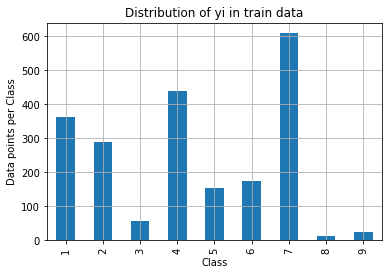

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


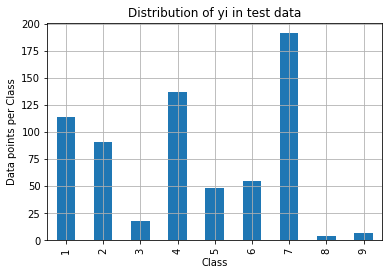

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


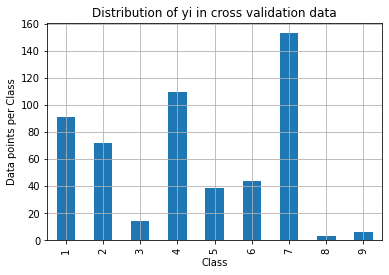

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [15]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [16]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.47577118346719
Log loss on Test Data using Random Model 2.4718213475159545
-------------------- Confusion matrix --------------------


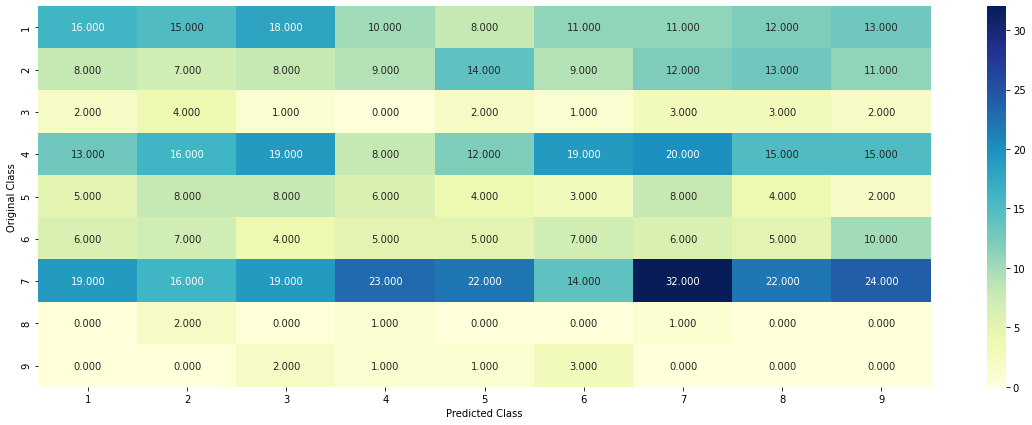

-------------------- Precision matrix (Columm Sum=1) --------------------


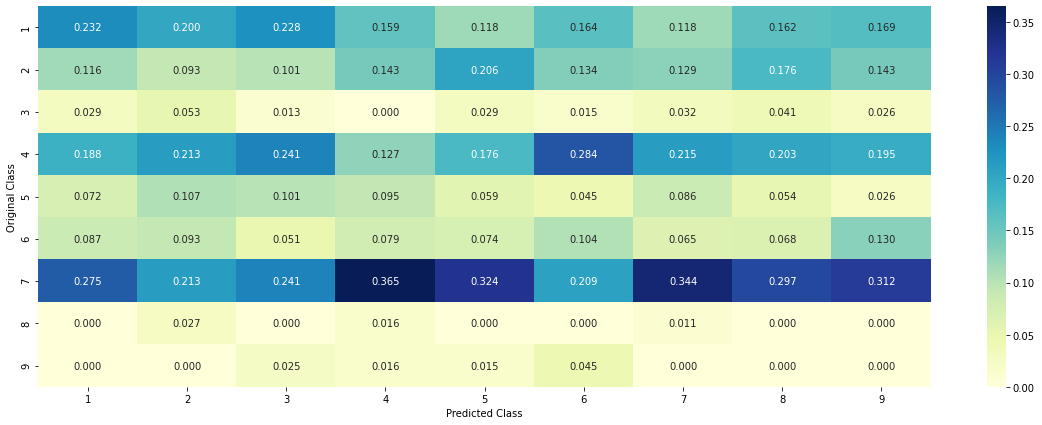

-------------------- Recall matrix (Row sum=1) --------------------


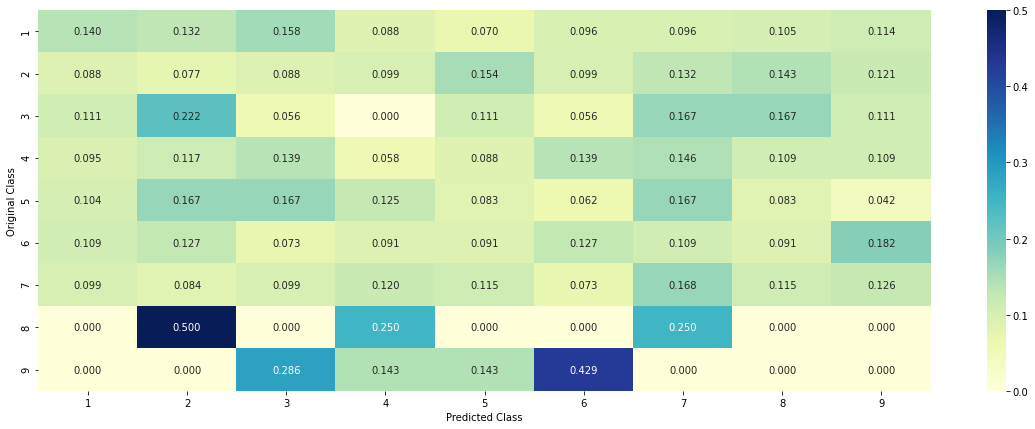

In [17]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [18]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [19]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 233
BRCA1     175
TP53      104
EGFR       94
BRCA2      79
PTEN       77
KIT        65
BRAF       57
ERBB2      48
ALK        38
CDKN2A     38
Name: Gene, dtype: int64


In [20]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 233 different categories of genes in the train data, and they are distibuted as follows


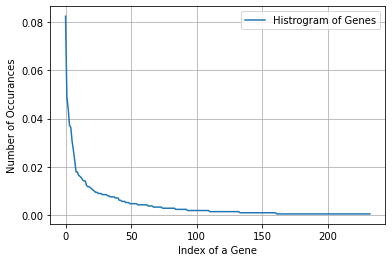

In [21]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


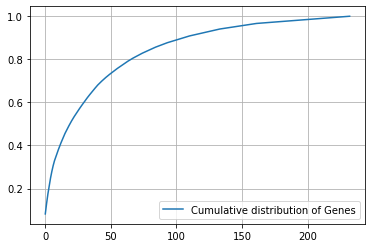

In [22]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [23]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [24]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [25]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [26]:
train_df['Gene'].head()

648     CDKN2A
2031    MAP2K1
982       ETV6
277       EGFR
1533       ALK
Name: Gene, dtype: object

In [27]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid5b',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gna11',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',

In [28]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 232)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.172013549070451
For values of alpha =  0.0001 The log loss is: 1.1665050512466288
For values of alpha =  0.001 The log loss is: 1.2316432438849403
For values of alpha =  0.01 The log loss is: 1.3467945278642024
For values of alpha =  0.1 The log loss is: 1.4535692113097176
For values of alpha =  1 The log loss is: 1.497334660630929


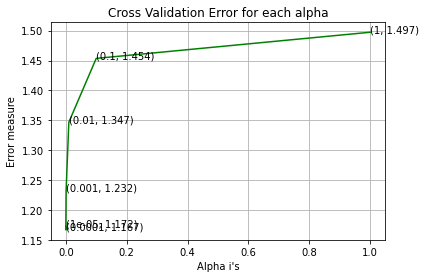

For values of best alpha =  0.0001 The train log loss is: 0.9928309732699612
For values of best alpha =  0.0001 The cross validation log loss is: 1.1665050512466288
For values of best alpha =  0.0001 The test log loss is: 1.1968901865825234


In [29]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [30]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  233  genes in train dataset?
Ans
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 511 out of  532 : 96.05263157894737


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [31]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1928
Truncating_Mutations    60
Amplification           50
Deletion                44
Fusions                 20
Overexpression           4
T58I                     3
Q61L                     3
A146V                    2
G12D                     2
G13D                     2
Name: Variation, dtype: int64


In [32]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1928 different categories of variations in the train data, and they are distibuted as follows


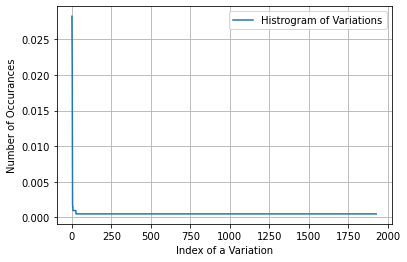

In [33]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02824859 0.05178908 0.07250471 ... 0.99905838 0.99952919 1.        ]


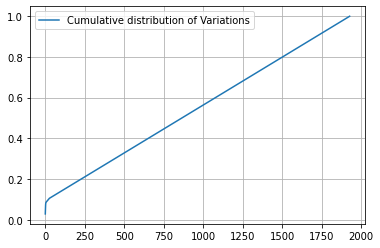

In [34]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [35]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [36]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [37]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [38]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1960)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7019802573560938
For values of alpha =  0.0001 The log loss is: 1.6926522142294138
For values of alpha =  0.001 The log loss is: 1.6976791730556564
For values of alpha =  0.01 The log loss is: 1.703173800806976
For values of alpha =  0.1 The log loss is: 1.7117016999056796
For values of alpha =  1 The log loss is: 1.712678616864138


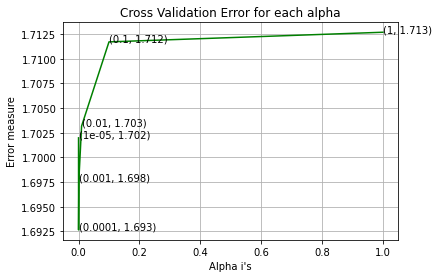

For values of best alpha =  0.0001 The train log loss is: 0.6254680143003768
For values of best alpha =  0.0001 The cross validation log loss is: 1.6926522142294138
For values of best alpha =  0.0001 The test log loss is: 1.708142750715991


In [39]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [40]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1928  genes in test and cross validation data sets?
Ans
1. In test data 67 out of 665 : 10.075187969924812
2. In cross validation data 58 out of  532 : 10.902255639097744


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [41]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [42]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [43]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 54011


In [44]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [45]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [46]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [47]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [48]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [49]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5637, 4: 3600, 6: 2881, 5: 2586, 7: 2539, 8: 1994, 9: 1752, 12: 1314, 10: 1247, 11: 1193, 13: 1139, 15: 1044, 14: 915, 16: 841, 18: 700, 17: 629, 19: 565, 20: 563, 21: 519, 24: 515, 22: 459, 23: 418, 28: 370, 30: 360, 27: 355, 42: 351, 26: 342, 35: 320, 25: 320, 36: 316, 29: 312, 32: 282, 50: 270, 33: 266, 31: 263, 40: 261, 34: 232, 38: 211, 37: 204, 39: 200, 45: 197, 41: 195, 44: 193, 43: 181, 48: 176, 46: 176, 52: 166, 49: 161, 51: 159, 47: 155, 60: 137, 57: 132, 56: 132, 70: 130, 58: 128, 63: 124, 54: 121, 72: 115, 55: 112, 62: 110, 64: 109, 80: 105, 68: 105, 59: 105, 53: 105, 65: 102, 66: 99, 71: 97, 67: 95, 61: 95, 76: 92, 74: 91, 84: 87, 69: 86, 79: 85, 75: 85, 77: 84, 73: 83, 100: 80, 91: 79, 78: 76, 81: 73, 87: 72, 95: 71, 90: 70, 88: 68, 105: 65, 120: 64, 86: 64, 83: 64, 82: 64, 93: 59, 98: 57, 94: 57, 92: 56, 89: 56, 110: 55, 85: 55, 109: 54, 103: 54, 97: 53, 104: 52, 102: 51, 115: 50, 111: 50, 112: 49, 116: 48, 114: 48, 106: 48, 96: 47, 133: 45, 107: 44, 140: 43,

For values of alpha =  1e-05 The log loss is: 1.3060984924435517
For values of alpha =  0.0001 The log loss is: 1.170276325289873
For values of alpha =  0.001 The log loss is: 1.1470986248109132
For values of alpha =  0.01 The log loss is: 1.300349924561453
For values of alpha =  0.1 The log loss is: 1.4400703248867086
For values of alpha =  1 The log loss is: 1.6301854803276097


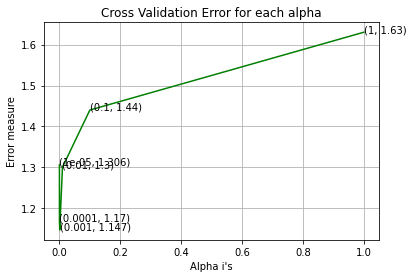

For values of best alpha =  0.001 The train log loss is: 0.6528130646234223
For values of best alpha =  0.001 The cross validation log loss is: 1.1470986248109132
For values of best alpha =  0.001 The test log loss is: 1.1612759229535667


In [50]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [51]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [52]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.282 % of word of test data appeared in train data
98.165 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [56]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [57]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [58]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [59]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

In [60]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 56203)
(number of data points * number of features) in test data =  (665, 56203)
(number of data points * number of features) in cross validation data = (532, 56203)


In [61]:

train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [62]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.2809895924762476
for alpha = 0.0001
Log Loss : 1.2779599802205341
for alpha = 0.001
Log Loss : 1.2718177974366924
for alpha = 0.1
Log Loss : 1.2669996957645318
for alpha = 1
Log Loss : 1.3515329619136738
for alpha = 10
Log Loss : 1.452630168820658
for alpha = 100
Log Loss : 1.4102795313007788
for alpha = 1000
Log Loss : 1.3477516882570826


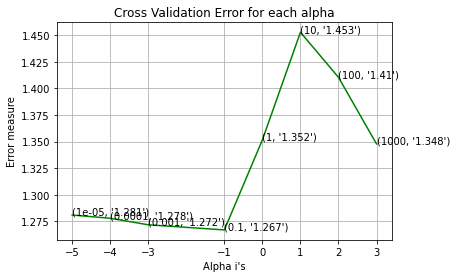

For values of best alpha =  0.1 The train log loss is: 0.8436159793970766
For values of best alpha =  0.1 The cross validation log loss is: 1.2669996957645318
For values of best alpha =  0.1 The test log loss is: 1.2813549325884122


In [63]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2669996957645318
Number of missclassified point : 0.39097744360902253
-------------------- Confusion matrix --------------------


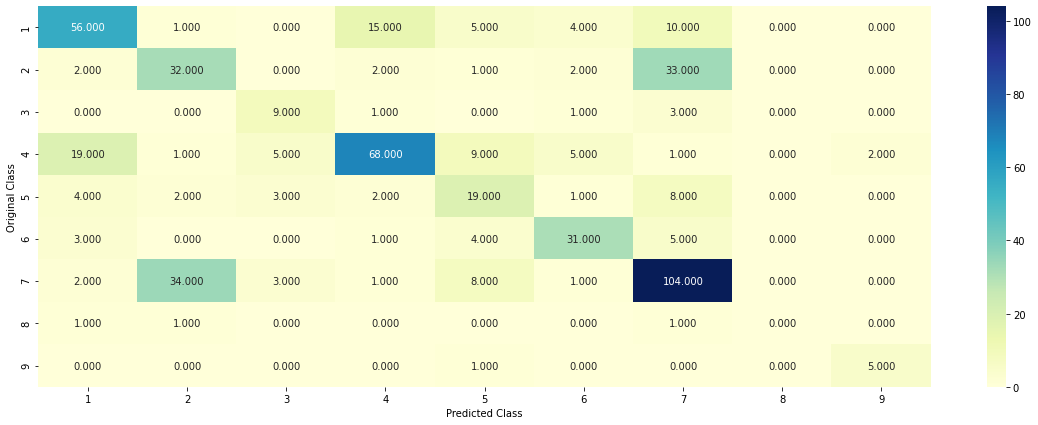

-------------------- Precision matrix (Columm Sum=1) --------------------


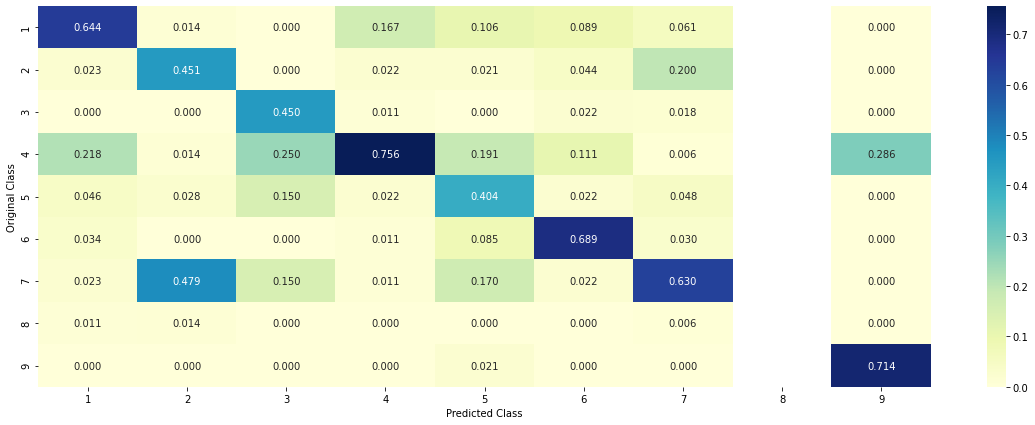

-------------------- Recall matrix (Row sum=1) --------------------


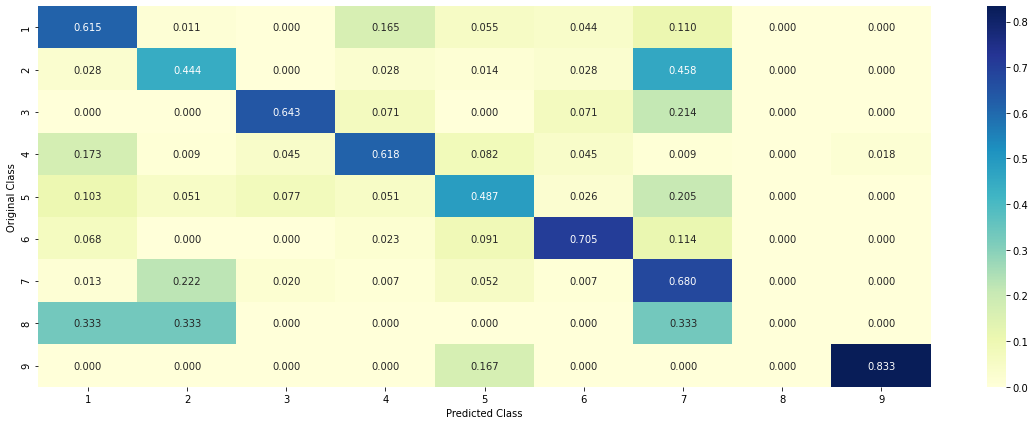

In [64]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [65]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0807 0.0601 0.0152 0.0898 0.0339 0.0332 0.6784 0.0047 0.004 ]]
Actual Class : 1
--------------------------------------------------
56 Text feature [mage] present in test data point [True]
Out of the top  100  features  1 are present in query point


In [66]:
test_df['TEXT'].iloc[test_point_index]

'genomic landscape tumor shapes shaped anti tumor immunity systematically explored using large scale genomic datasets solid tissue tumor biopsies quantified cytolytic activity local immune infiltrate identified associated properties across 18 tumor types number predicted mhc class associated neoantigens correlated cytolytic activity lower expected colorectal tumors suggesting immune mediated elimination identified recurrently mutated genes showed positive association cytolytic activity including beta 2 microglobulin b2m hla b c caspase 8 casp8 highlighting loss antigen presentation blockade extrinsic apoptosis key strategies resistance cytolytic activity genetic amplifications also associated high cytolytic activity including immunosuppressive factors pdl1 2 alox12b 15b genetic findings thus provide evidence immunoediting tumors uncover mechanisms tumor intrinsic resistance cytolytic activity go introduction recent success checkpoint blockade therapy ctla4 pd1 pdl1 inducing durable con

In [67]:
no_feature

100

In [68]:
test_df['Gene'].iloc[test_point_index]

'B2M'

In [69]:
test_df['Variation'].iloc[test_point_index]

'Deletion'

In [70]:
clf.coef_.shape

(9, 56203)

In [71]:
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
indices[0]

array([27548, 33575, 33576, 33585, 45431, 33589, 33600, 45425, 21862,
       11243, 33601, 21860, 11246, 11247, 45417, 33602, 45416, 11251,
       21858, 45413, 33603, 33608, 45410, 45409, 33616, 11261, 21851,
       33617, 33574, 33622, 21881, 45462, 11188, 45508, 33524, 21914,
       21911, 11193, 33525, 33527, 45502, 11198, 45501, 33528, 45485,
       45482, 33534, 11212, 11213, 11214, 11215, 33537, 33542, 11221,
       11222, 11223, 33544, 33549, 45465, 33569, 45403, 33625, 33632,
       45332, 11308, 45331, 11310, 33661, 33663, 33665, 11314, 11317,
       11318, 11319, 11320, 11321, 33666, 45310, 45309, 33669, 21801,
       45295, 21799, 21798, 11334, 45281, 45279, 45276, 45270, 21796,
       33659, 33653, 45348, 21814, 45399, 33633, 45391, 21835, 11273,
       45389], dtype=int64)

In [72]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [73]:
for i in range(10):
  test_point_index = i
  no_feature = 100
  predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
  print("Predicted Class :", predicted_cls[0])
  print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
  print("Actual Class :", test_y[test_point_index])
  indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:]
  print("-"*50)
  get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0807 0.0601 0.0152 0.0898 0.0339 0.0332 0.6785 0.0047 0.004 ]]
Actual Class : 2
--------------------------------------------------
16497 Text feature [odds] present in test data point [True]
22858 Text feature [467] present in test data point [True]
25588 Text feature [dup] present in test data point [True]
26492 Text feature [ne] present in test data point [True]
27209 Text feature [logistic] present in test data point [True]
32876 Text feature [flowchart] present in test data point [True]
33693 Text feature [standardized] present in test data point [True]
33935 Text feature [as3] present in test data point [True]
34000 Text feature [049] present in test data point [True]
34465 Text feature [beside] present in test data point [True]
36301 Text feature [fell] present in test data point [True]
36384 Text feature [565] present in test data point [True]
37361 Text feature [country] present in test data point [True]
37383 Text feature 

51008 Text feature [bias] present in test data point [True]
51012 Text feature [gives] present in test data point [True]
51056 Text feature [2nd] present in test data point [True]
51111 Text feature [disappears] present in test data point [True]
51116 Text feature [funded] present in test data point [True]
51138 Text feature [looked] present in test data point [True]
51237 Text feature [guidelines] present in test data point [True]
51263 Text feature [quantity] present in test data point [True]
51269 Text feature [accurate] present in test data point [True]
51307 Text feature [register] present in test data point [True]
51325 Text feature [m2] present in test data point [True]
51366 Text feature [eleven] present in test data point [True]
51426 Text feature [healthcare] present in test data point [True]
51496 Text feature [v16] present in test data point [True]
51688 Text feature [deviation] present in test data point [True]
51776 Text feature [estimate] present in test data point [True

53748 Text feature [recommended] present in test data point [True]
53768 Text feature [systematic] present in test data point [True]
53773 Text feature [prospectively] present in test data point [True]
53777 Text feature [ci] present in test data point [True]
53786 Text feature [age] present in test data point [True]
53787 Text feature [makes] present in test data point [True]
53791 Text feature [insertion] present in test data point [True]
53792 Text feature [clinic] present in test data point [True]
53794 Text feature [avoid] present in test data point [True]
53806 Text feature [cooperate] present in test data point [True]
53811 Text feature [late] present in test data point [True]
53814 Text feature [multivariate] present in test data point [True]
53815 Text feature [recorded] present in test data point [True]
53823 Text feature [nodes] present in test data point [True]
53830 Text feature [confidence] present in test data point [True]
53866 Text feature [kras] present in test data p

54646 Text feature [usa] present in test data point [True]
54647 Text feature [behavior] present in test data point [True]
54654 Text feature [determining] present in test data point [True]
54657 Text feature [edta] present in test data point [True]
54676 Text feature [adenocarcinoma] present in test data point [True]
54681 Text feature [comprise] present in test data point [True]
54682 Text feature [routine] present in test data point [True]
54685 Text feature [quality] present in test data point [True]
54687 Text feature [comparing] present in test data point [True]
54689 Text feature [95] present in test data point [True]
54692 Text feature [student] present in test data point [True]
54697 Text feature [allowed] present in test data point [True]
54712 Text feature [egfr] present in test data point [True]
54714 Text feature [enrolled] present in test data point [True]
54716 Text feature [deletion] present in test data point [True]
54720 Text feature [overlapping] present in test data

55252 Text feature [values] present in test data point [True]
55256 Text feature [ten] present in test data point [True]
55260 Text feature [unknown] present in test data point [True]
55268 Text feature [poor] present in test data point [True]
55270 Text feature [drugs] present in test data point [True]
55273 Text feature [ca] present in test data point [True]
55277 Text feature [follow] present in test data point [True]
55278 Text feature [consisting] present in test data point [True]
55279 Text feature [setting] present in test data point [True]
55280 Text feature [original] present in test data point [True]
55289 Text feature [worse] present in test data point [True]
55293 Text feature [polymerase] present in test data point [True]
55295 Text feature [full] present in test data point [True]
55298 Text feature [mainly] present in test data point [True]
55304 Text feature [months] present in test data point [True]
55306 Text feature [extraction] present in test data point [True]
55307

55655 Text feature [75] present in test data point [True]
55660 Text feature [metastatic] present in test data point [True]
55663 Text feature [relatively] present in test data point [True]
55666 Text feature [decrease] present in test data point [True]
55668 Text feature [required] present in test data point [True]
55670 Text feature [expected] present in test data point [True]
55671 Text feature [range] present in test data point [True]
55672 Text feature [41] present in test data point [True]
55676 Text feature [primary] present in test data point [True]
55681 Text feature [known] present in test data point [True]
55685 Text feature [comparison] present in test data point [True]
55687 Text feature [70] present in test data point [True]
55688 Text feature [extracted] present in test data point [True]
55689 Text feature [intracellular] present in test data point [True]
55692 Text feature [agents] present in test data point [True]
55694 Text feature [moreover] present in test data poin

55954 Text feature [14] present in test data point [True]
55957 Text feature [even] present in test data point [True]
55958 Text feature [33] present in test data point [True]
55960 Text feature [survival] present in test data point [True]
55961 Text feature [comparable] present in test data point [True]
55964 Text feature [part] present in test data point [True]
55965 Text feature [effects] present in test data point [True]
55968 Text feature [role] present in test data point [True]
55971 Text feature [clinically] present in test data point [True]
55972 Text feature [complete] present in test data point [True]
55974 Text feature [positive] present in test data point [True]
55975 Text feature [per] present in test data point [True]
55980 Text feature [tumors] present in test data point [True]
55982 Text feature [according] present in test data point [True]
55983 Text feature [highly] present in test data point [True]
55984 Text feature [28] present in test data point [True]
55986 Text 

474 Text feature [erp] present in test data point [True]
478 Text feature [azacytidine] present in test data point [True]
1026 Text feature [blobe] present in test data point [True]
1080 Text feature [mfi] present in test data point [True]
1529 Text feature [me3] present in test data point [True]
1599 Text feature [medema] present in test data point [True]
1692 Text feature [re2] present in test data point [True]
1756 Text feature [re1] present in test data point [True]
1786 Text feature [billaud] present in test data point [True]
1870 Text feature [biochrom] present in test data point [True]
2015 Text feature [shipp] present in test data point [True]
2203 Text feature [adept] present in test data point [True]
2436 Text feature [lechner] present in test data point [True]
2626 Text feature [ablating] present in test data point [True]
2826 Text feature [site2] present in test data point [True]
3142 Text feature [sakaguchi] present in test data point [True]
3425 Text feature [lowmelting] 

16811 Text feature [hat] present in test data point [True]
16813 Text feature [ward] present in test data point [True]
16841 Text feature [axin2] present in test data point [True]
16871 Text feature [1642] present in test data point [True]
16924 Text feature [biallelically] present in test data point [True]
16962 Text feature [microsatellites] present in test data point [True]
16985 Text feature [hmb] present in test data point [True]
17013 Text feature [imputed] present in test data point [True]
17022 Text feature [pd1] present in test data point [True]
17199 Text feature [backed] present in test data point [True]
17201 Text feature [microdeletion] present in test data point [True]
17250 Text feature [p24] present in test data point [True]
17303 Text feature [1366] present in test data point [True]
17305 Text feature [pathogenic] present in test data point [True]
17308 Text feature [molt] present in test data point [True]
17314 Text feature [knockouts] present in test data point [True

22688 Text feature [truncating] present in test data point [True]
22706 Text feature [756] present in test data point [True]
22713 Text feature [ago] present in test data point [True]
22790 Text feature [373a] present in test data point [True]
22814 Text feature [tonsils] present in test data point [True]
22884 Text feature [sanchez] present in test data point [True]
22885 Text feature [kandoth] present in test data point [True]
22894 Text feature [til] present in test data point [True]
22945 Text feature [inefficiently] present in test data point [True]
22989 Text feature [screenings] present in test data point [True]
22995 Text feature [immunocompetent] present in test data point [True]
23048 Text feature [predisposing] present in test data point [True]
23052 Text feature [368] present in test data point [True]
23072 Text feature [hbss] present in test data point [True]
23084 Text feature [trimeric] present in test data point [True]
23108 Text feature [electric] present in test data 

26120 Text feature [herbst] present in test data point [True]
26125 Text feature [1362] present in test data point [True]
26251 Text feature [withthe] present in test data point [True]
26445 Text feature [plasmacytoid] present in test data point [True]
26493 Text feature [pc] present in test data point [True]
26519 Text feature [235] present in test data point [True]
26526 Text feature [invisible] present in test data point [True]
26540 Text feature [pstat1] present in test data point [True]
26592 Text feature [bayesian] present in test data point [True]
26602 Text feature [degrade] present in test data point [True]
26605 Text feature [ros] present in test data point [True]
26620 Text feature [toxin] present in test data point [True]
26638 Text feature [jointly] present in test data point [True]
26648 Text feature [modulatory] present in test data point [True]
26654 Text feature [cys] present in test data point [True]
26656 Text feature [probability] present in test data point [True]
2

31276 Text feature [sulfonic] present in test data point [True]
31342 Text feature [unstable] present in test data point [True]
31348 Text feature [bcl6] present in test data point [True]
31388 Text feature [permutation] present in test data point [True]
31407 Text feature [d5] present in test data point [True]
31409 Text feature [e3] present in test data point [True]
31425 Text feature [249] present in test data point [True]
31428 Text feature [dong] present in test data point [True]
31440 Text feature [bam] present in test data point [True]
31443 Text feature [methylation] present in test data point [True]
31456 Text feature [inf] present in test data point [True]
31496 Text feature [refractoriness] present in test data point [True]
31520 Text feature [biosynthesis] present in test data point [True]
31531 Text feature [hc] present in test data point [True]
31532 Text feature [gr1] present in test data point [True]
31549 Text feature [pbmcs] present in test data point [True]
31568 Tex

34344 Text feature [roberts] present in test data point [True]
34379 Text feature [coactivator] present in test data point [True]
34386 Text feature [acetyltransferase] present in test data point [True]
34406 Text feature [dianova] present in test data point [True]
34448 Text feature [message] present in test data point [True]
34457 Text feature [lps] present in test data point [True]
34467 Text feature [gg] present in test data point [True]
34473 Text feature [064] present in test data point [True]
34474 Text feature [lox] present in test data point [True]
34475 Text feature [incapable] present in test data point [True]
34488 Text feature [bcl2] present in test data point [True]
34513 Text feature [sp6] present in test data point [True]
34546 Text feature [thymus] present in test data point [True]
34562 Text feature [1251] present in test data point [True]
34571 Text feature [biogenex] present in test data point [True]
34631 Text feature [azide] present in test data point [True]
34632

37567 Text feature [vessel] present in test data point [True]
37594 Text feature [proposition] present in test data point [True]
37639 Text feature [variant] present in test data point [True]
37678 Text feature [prediction] present in test data point [True]
37685 Text feature [splice] present in test data point [True]
37706 Text feature [associatedwith] present in test data point [True]
37756 Text feature [coinciding] present in test data point [True]
37773 Text feature [9e] present in test data point [True]
38373 Text feature [culminated] present in test data point [True]
38402 Text feature [1502] present in test data point [True]
38797 Text feature [needless] present in test data point [True]
39203 Text feature [unbalanced] present in test data point [True]
39206 Text feature [hemi] present in test data point [True]
39249 Text feature [hits] present in test data point [True]
39252 Text feature [inactivate] present in test data point [True]
39253 Text feature [201] present in test dat

41345 Text feature [str] present in test data point [True]
41347 Text feature [purine] present in test data point [True]
41372 Text feature [coincidence] present in test data point [True]
41391 Text feature [tg] present in test data point [True]
41394 Text feature [antihuman] present in test data point [True]
41397 Text feature [mono] present in test data point [True]
41401 Text feature [dct] present in test data point [True]
41409 Text feature [cd3] present in test data point [True]
41410 Text feature [8p11] present in test data point [True]
41413 Text feature [bulk] present in test data point [True]
41414 Text feature [convert] present in test data point [True]
41417 Text feature [rantes] present in test data point [True]
41420 Text feature [xs] present in test data point [True]
41500 Text feature [restrict] present in test data point [True]
41671 Text feature [worked] present in test data point [True]
41823 Text feature [microbiology] present in test data point [True]
41838 Text fea

43616 Text feature [lin] present in test data point [True]
43629 Text feature [r1] present in test data point [True]
43638 Text feature [transcribe] present in test data point [True]
43684 Text feature [terminally] present in test data point [True]
43692 Text feature [kcl] present in test data point [True]
43695 Text feature [832] present in test data point [True]
43705 Text feature [risk] present in test data point [True]
43709 Text feature [le] present in test data point [True]
43727 Text feature [phenomena] present in test data point [True]
43734 Text feature [destruction] present in test data point [True]
43765 Text feature [web] present in test data point [True]
43783 Text feature [pbmc] present in test data point [True]
43788 Text feature [originated] present in test data point [True]
43793 Text feature [infiltrated] present in test data point [True]
43798 Text feature [t7] present in test data point [True]
43816 Text feature [impede] present in test data point [True]
43822 Text 

46020 Text feature [elisa] present in test data point [True]
46025 Text feature [075] present in test data point [True]
46033 Text feature [execution] present in test data point [True]
46056 Text feature [vegf] present in test data point [True]
46057 Text feature [ccle] present in test data point [True]
46065 Text feature [european] present in test data point [True]
46070 Text feature [mhc] present in test data point [True]
46071 Text feature [gamma] present in test data point [True]
46087 Text feature [phillips] present in test data point [True]
46095 Text feature [heterozygosity] present in test data point [True]
46164 Text feature [genotypic] present in test data point [True]
46166 Text feature [hundreds] present in test data point [True]
46168 Text feature [macrophages] present in test data point [True]
46169 Text feature [436] present in test data point [True]
46180 Text feature [sizable] present in test data point [True]
46183 Text feature [hughes] present in test data point [Tru

47592 Text feature [june] present in test data point [True]
47603 Text feature [ethidium] present in test data point [True]
47605 Text feature [transversion] present in test data point [True]
47610 Text feature [264] present in test data point [True]
47611 Text feature [depleted] present in test data point [True]
47612 Text feature [igg1] present in test data point [True]
47614 Text feature [radiolabeled] present in test data point [True]
47618 Text feature [degradation] present in test data point [True]
47622 Text feature [deregulating] present in test data point [True]
47632 Text feature [deviated] present in test data point [True]
47640 Text feature [tumori] present in test data point [True]
47641 Text feature [cnas] present in test data point [True]
47642 Text feature [polyoma] present in test data point [True]
47643 Text feature [scheme] present in test data point [True]
47644 Text feature [premalignant] present in test data point [True]
47645 Text feature [company] present in tes

48905 Text feature [percent] present in test data point [True]
48907 Text feature [brown] present in test data point [True]
48909 Text feature [monitor] present in test data point [True]
48917 Text feature [alleles] present in test data point [True]
48925 Text feature [killer] present in test data point [True]
48934 Text feature [adenoviral] present in test data point [True]
48938 Text feature [seq] present in test data point [True]
48942 Text feature [s2d] present in test data point [True]
48953 Text feature [inactivated] present in test data point [True]
48955 Text feature [consideration] present in test data point [True]
48961 Text feature [ctla] present in test data point [True]
48962 Text feature [modify] present in test data point [True]
48978 Text feature [spindle] present in test data point [True]
48986 Text feature [autoradiography] present in test data point [True]
49010 Text feature [formally] present in test data point [True]
49019 Text feature [shaped] present in test data

50102 Text feature [bcr] present in test data point [True]
50104 Text feature [helping] present in test data point [True]
50106 Text feature [corroborated] present in test data point [True]
50107 Text feature [ab] present in test data point [True]
50108 Text feature [ligated] present in test data point [True]
50112 Text feature [tac] present in test data point [True]
50113 Text feature [definitive] present in test data point [True]
50124 Text feature [fl] present in test data point [True]
50128 Text feature [candidates] present in test data point [True]
50138 Text feature [entities] present in test data point [True]
50140 Text feature [employing] present in test data point [True]
50145 Text feature [echo] present in test data point [True]
50150 Text feature [appreciated] present in test data point [True]
50153 Text feature [immobilon] present in test data point [True]
50154 Text feature [lineage] present in test data point [True]
50156 Text feature [017] present in test data point [Tru

50826 Text feature [transcriptional] present in test data point [True]
50827 Text feature [cytometric] present in test data point [True]
50831 Text feature [coexist] present in test data point [True]
50833 Text feature [1984] present in test data point [True]
50840 Text feature [reads] present in test data point [True]
50853 Text feature [ha] present in test data point [True]
50863 Text feature [spontaneous] present in test data point [True]
50872 Text feature [ihc] present in test data point [True]
50874 Text feature [7e] present in test data point [True]
50881 Text feature [lymphocytic] present in test data point [True]
50883 Text feature [explanations] present in test data point [True]
50888 Text feature [scatter] present in test data point [True]
50889 Text feature [variance] present in test data point [True]
50890 Text feature [nonoverlapping] present in test data point [True]
50891 Text feature [5f] present in test data point [True]
50894 Text feature [atmosphere] present in test

51609 Text feature [supernatant] present in test data point [True]
51615 Text feature [radiation] present in test data point [True]
51617 Text feature [retains] present in test data point [True]
51620 Text feature [italy] present in test data point [True]
51621 Text feature [s8] present in test data point [True]
51622 Text feature [translocations] present in test data point [True]
51626 Text feature [1996] present in test data point [True]
51628 Text feature [databases] present in test data point [True]
51640 Text feature [divergent] present in test data point [True]
51642 Text feature [upregulates] present in test data point [True]
51644 Text feature [master] present in test data point [True]
51655 Text feature [orders] present in test data point [True]
51657 Text feature [spleen] present in test data point [True]
51659 Text feature [reactivation] present in test data point [True]
51665 Text feature [rich] present in test data point [True]
51672 Text feature [hepatitis] present in tes

52151 Text feature [mn] present in test data point [True]
52152 Text feature [robustly] present in test data point [True]
52157 Text feature [aag] present in test data point [True]
52159 Text feature [xhoi] present in test data point [True]
52164 Text feature [agreement] present in test data point [True]
52169 Text feature [g1] present in test data point [True]
52172 Text feature [endoplasmic] present in test data point [True]
52173 Text feature [immunotherapy] present in test data point [True]
52174 Text feature [conceivable] present in test data point [True]
52180 Text feature [van] present in test data point [True]
52186 Text feature [deleted] present in test data point [True]
52190 Text feature [piscataway] present in test data point [True]
52192 Text feature [colon] present in test data point [True]
52198 Text feature [attenuation] present in test data point [True]
52199 Text feature [transducing] present in test data point [True]
52209 Text feature [reversed] present in test data

52602 Text feature [fourteen] present in test data point [True]
52608 Text feature [lymphoma] present in test data point [True]
52612 Text feature [inverse] present in test data point [True]
52613 Text feature [suitable] present in test data point [True]
52614 Text feature [deal] present in test data point [True]
52617 Text feature [fax] present in test data point [True]
52618 Text feature [distinction] present in test data point [True]
52620 Text feature [ever] present in test data point [True]
52628 Text feature [angiogenesis] present in test data point [True]
52629 Text feature [apoptotic] present in test data point [True]
52634 Text feature [challenging] present in test data point [True]
52639 Text feature [sepharose] present in test data point [True]
52645 Text feature [interaction] present in test data point [True]
52661 Text feature [build] present in test data point [True]
52665 Text feature [toxic] present in test data point [True]
52668 Text feature [pmsf] present in test dat

53077 Text feature [kb] present in test data point [True]
53078 Text feature [northern] present in test data point [True]
53079 Text feature [fragments] present in test data point [True]
53080 Text feature [regimens] present in test data point [True]
53081 Text feature [constants] present in test data point [True]
53082 Text feature [mapped] present in test data point [True]
53085 Text feature [mesenchymal] present in test data point [True]
53086 Text feature [cytoplasmic] present in test data point [True]
53096 Text feature [define] present in test data point [True]
53100 Text feature [lymphoid] present in test data point [True]
53103 Text feature [switch] present in test data point [True]
53107 Text feature [coated] present in test data point [True]
53109 Text feature [focal] present in test data point [True]
53116 Text feature [participate] present in test data point [True]
53117 Text feature [envision] present in test data point [True]
53119 Text feature [proliferating] present in 

53389 Text feature [beads] present in test data point [True]
53390 Text feature [dimensional] present in test data point [True]
53398 Text feature [january] present in test data point [True]
53399 Text feature [searched] present in test data point [True]
53402 Text feature [poorer] present in test data point [True]
53403 Text feature [validating] present in test data point [True]
53404 Text feature [exchange] present in test data point [True]
53407 Text feature [lexington] present in test data point [True]
53411 Text feature [93] present in test data point [True]
53418 Text feature [functionally] present in test data point [True]
53421 Text feature [hybridized] present in test data point [True]
53424 Text feature [catalog] present in test data point [True]
53426 Text feature [tendency] present in test data point [True]
53427 Text feature [huang] present in test data point [True]
53428 Text feature [coexistence] present in test data point [True]
53431 Text feature [distinguish] present 

53679 Text feature [efficient] present in test data point [True]
53681 Text feature [exogenously] present in test data point [True]
53682 Text feature [4e] present in test data point [True]
53684 Text feature [set] present in test data point [True]
53686 Text feature [fourth] present in test data point [True]
53687 Text feature [thyroid] present in test data point [True]
53690 Text feature [controlling] present in test data point [True]
53696 Text feature [dominant] present in test data point [True]
53699 Text feature [material] present in test data point [True]
53700 Text feature [expansion] present in test data point [True]
53702 Text feature [across] present in test data point [True]
53708 Text feature [iii] present in test data point [True]
53710 Text feature [helped] present in test data point [True]
53711 Text feature [heterogeneous] present in test data point [True]
53712 Text feature [s5a] present in test data point [True]
53714 Text feature [monitored] present in test data poi

53956 Text feature [technique] present in test data point [True]
53958 Text feature [triggered] present in test data point [True]
53959 Text feature [clear] present in test data point [True]
53960 Text feature [81] present in test data point [True]
53961 Text feature [003] present in test data point [True]
53962 Text feature [issue] present in test data point [True]
53963 Text feature [unless] present in test data point [True]
53964 Text feature [perspective] present in test data point [True]
53965 Text feature [deletions] present in test data point [True]
53966 Text feature [reduce] present in test data point [True]
53969 Text feature [ectopic] present in test data point [True]
53970 Text feature [rneasy] present in test data point [True]
53974 Text feature [bands] present in test data point [True]
53977 Text feature [weekly] present in test data point [True]
53979 Text feature [s5c] present in test data point [True]
53981 Text feature [evolution] present in test data point [True]
539

54204 Text feature [feasibility] present in test data point [True]
54205 Text feature [filters] present in test data point [True]
54206 Text feature [wilmington] present in test data point [True]
54207 Text feature [cytokine] present in test data point [True]
54208 Text feature [profiled] present in test data point [True]
54209 Text feature [map] present in test data point [True]
54210 Text feature [measure] present in test data point [True]
54211 Text feature [vs] present in test data point [True]
54212 Text feature [lost] present in test data point [True]
54213 Text feature [predicts] present in test data point [True]
54214 Text feature [power] present in test data point [True]
54215 Text feature [routinely] present in test data point [True]
54216 Text feature [analyze] present in test data point [True]
54217 Text feature [dose] present in test data point [True]
54219 Text feature [preventing] present in test data point [True]
54220 Text feature [animals] present in test data point [

54429 Text feature [past] present in test data point [True]
54431 Text feature [counter] present in test data point [True]
54434 Text feature [drivers] present in test data point [True]
54439 Text feature [roles] present in test data point [True]
54440 Text feature [prompted] present in test data point [True]
54441 Text feature [aldrich] present in test data point [True]
54442 Text feature [start] present in test data point [True]
54443 Text feature [dilution] present in test data point [True]
54445 Text feature [600] present in test data point [True]
54446 Text feature [rad] present in test data point [True]
54450 Text feature [differential] present in test data point [True]
54454 Text feature [scale] present in test data point [True]
54455 Text feature [served] present in test data point [True]
54457 Text feature [carcinomas] present in test data point [True]
54458 Text feature [hence] present in test data point [True]
54459 Text feature [87] present in test data point [True]
54461 T

54659 Text feature [consequence] present in test data point [True]
54660 Text feature [responsiveness] present in test data point [True]
54661 Text feature [alteration] present in test data point [True]
54662 Text feature [metastases] present in test data point [True]
54666 Text feature [arrows] present in test data point [True]
54667 Text feature [created] present in test data point [True]
54668 Text feature [pronounced] present in test data point [True]
54669 Text feature [supporting] present in test data point [True]
54671 Text feature [proliferative] present in test data point [True]
54672 Text feature [responding] present in test data point [True]
54673 Text feature [comparative] present in test data point [True]
54674 Text feature [pre] present in test data point [True]
54675 Text feature [relevance] present in test data point [True]
54676 Text feature [adenocarcinoma] present in test data point [True]
54677 Text feature [phenomenon] present in test data point [True]
54678 Text f

54856 Text feature [detailed] present in test data point [True]
54857 Text feature [dead] present in test data point [True]
54861 Text feature [diluted] present in test data point [True]
54862 Text feature [binds] present in test data point [True]
54863 Text feature [primer] present in test data point [True]
54864 Text feature [respect] present in test data point [True]
54866 Text feature [volume] present in test data point [True]
54867 Text feature [members] present in test data point [True]
54868 Text feature [profiling] present in test data point [True]
54870 Text feature [lesion] present in test data point [True]
54871 Text feature [blots] present in test data point [True]
54872 Text feature [city] present in test data point [True]
54874 Text feature [regulates] present in test data point [True]
54875 Text feature [sequence] present in test data point [True]
54876 Text feature [cannot] present in test data point [True]
54877 Text feature [approaches] present in test data point [Tru

55036 Text feature [version] present in test data point [True]
55037 Text feature [mg] present in test data point [True]
55038 Text feature [affecting] present in test data point [True]
55040 Text feature [membrane] present in test data point [True]
55041 Text feature [cloning] present in test data point [True]
55042 Text feature [attributed] present in test data point [True]
55044 Text feature [discovered] present in test data point [True]
55048 Text feature [profiles] present in test data point [True]
55049 Text feature [diseases] present in test data point [True]
55050 Text feature [sought] present in test data point [True]
55051 Text feature [elucidated] present in test data point [True]
55052 Text feature [alter] present in test data point [True]
55053 Text feature [documented] present in test data point [True]
55054 Text feature [stronger] present in test data point [True]
55055 Text feature [portion] present in test data point [True]
55056 Text feature [eventually] present in te

55201 Text feature [suppressed] present in test data point [True]
55202 Text feature [clone] present in test data point [True]
55203 Text feature [co2] present in test data point [True]
55204 Text feature [qiagen] present in test data point [True]
55205 Text feature [specimens] present in test data point [True]
55206 Text feature [directions] present in test data point [True]
55207 Text feature [proteins] present in test data point [True]
55208 Text feature [representing] present in test data point [True]
55209 Text feature [median] present in test data point [True]
55210 Text feature [cdnas] present in test data point [True]
55211 Text feature [retroviral] present in test data point [True]
55212 Text feature [reactions] present in test data point [True]
55213 Text feature [wide] present in test data point [True]
55214 Text feature [pbs] present in test data point [True]
55215 Text feature [focused] present in test data point [True]
55216 Text feature [toxicity] present in test data po

55359 Text feature [preparation] present in test data point [True]
55360 Text feature [induce] present in test data point [True]
55361 Text feature [ranging] present in test data point [True]
55362 Text feature [interest] present in test data point [True]
55363 Text feature [capable] present in test data point [True]
55365 Text feature [mean] present in test data point [True]
55366 Text feature [sufficient] present in test data point [True]
55367 Text feature [japan] present in test data point [True]
55368 Text feature [causes] present in test data point [True]
55370 Text feature [nature] present in test data point [True]
55371 Text feature [appears] present in test data point [True]
55373 Text feature [via] present in test data point [True]
55374 Text feature [diego] present in test data point [True]
55375 Text feature [striking] present in test data point [True]
55376 Text feature [confirming] present in test data point [True]
55377 Text feature [year] present in test data point [Tru

55526 Text feature [extent] present in test data point [True]
55527 Text feature [second] present in test data point [True]
55528 Text feature [ultimately] present in test data point [True]
55529 Text feature [develop] present in test data point [True]
55530 Text feature [approval] present in test data point [True]
55531 Text feature [except] present in test data point [True]
55532 Text feature [clearly] present in test data point [True]
55533 Text feature [61] present in test data point [True]
55534 Text feature [regulated] present in test data point [True]
55535 Text feature [neither] present in test data point [True]
55536 Text feature [exhibit] present in test data point [True]
55537 Text feature [biological] present in test data point [True]
55538 Text feature [67] present in test data point [True]
55539 Text feature [bearing] present in test data point [True]
55540 Text feature [products] present in test data point [True]
55541 Text feature [detection] present in test data point 

55681 Text feature [known] present in test data point [True]
55682 Text feature [4c] present in test data point [True]
55683 Text feature [purchased] present in test data point [True]
55684 Text feature [majority] present in test data point [True]
55685 Text feature [comparison] present in test data point [True]
55686 Text feature [induces] present in test data point [True]
55687 Text feature [70] present in test data point [True]
55688 Text feature [extracted] present in test data point [True]
55689 Text feature [intracellular] present in test data point [True]
55690 Text feature [grown] present in test data point [True]
55691 Text feature [2d] present in test data point [True]
55692 Text feature [agents] present in test data point [True]
55693 Text feature [occurs] present in test data point [True]
55694 Text feature [moreover] present in test data point [True]
55695 Text feature [us] present in test data point [True]
55696 Text feature [case] present in test data point [True]
55697 

55822 Text feature [contained] present in test data point [True]
55823 Text feature [carried] present in test data point [True]
55824 Text feature [variety] present in test data point [True]
55825 Text feature [34] present in test data point [True]
55826 Text feature [along] present in test data point [True]
55827 Text feature [download] present in test data point [True]
55828 Text feature [reports] present in test data point [True]
55829 Text feature [somatic] present in test data point [True]
55830 Text feature [future] present in test data point [True]
55831 Text feature [containing] present in test data point [True]
55832 Text feature [dependent] present in test data point [True]
55833 Text feature [briefly] present in test data point [True]
55834 Text feature [72] present in test data point [True]
55835 Text feature [limited] present in test data point [True]
55836 Text feature [difference] present in test data point [True]
55837 Text feature [negative] present in test data point 

55960 Text feature [survival] present in test data point [True]
55961 Text feature [comparable] present in test data point [True]
55962 Text feature [relative] present in test data point [True]
55963 Text feature [subsequently] present in test data point [True]
55964 Text feature [part] present in test data point [True]
55965 Text feature [effects] present in test data point [True]
55966 Text feature [represent] present in test data point [True]
55967 Text feature [four] present in test data point [True]
55968 Text feature [role] present in test data point [True]
55969 Text feature [subsequent] present in test data point [True]
55970 Text feature [go] present in test data point [True]
55971 Text feature [clinically] present in test data point [True]
55972 Text feature [complete] present in test data point [True]
55973 Text feature [major] present in test data point [True]
55974 Text feature [positive] present in test data point [True]
55975 Text feature [per] present in test data point

56104 Text feature [mutation] present in test data point [True]
56105 Text feature [constitutive] present in test data point [True]
56106 Text feature [leading] present in test data point [True]
56107 Text feature [others] present in test data point [True]
56108 Text feature [new] present in test data point [True]
56109 Text feature [identified] present in test data point [True]
56111 Text feature [15] present in test data point [True]
56112 Text feature [could] present in test data point [True]
56113 Text feature [without] present in test data point [True]
56114 Text feature [fig] present in test data point [True]
56115 Text feature [thus] present in test data point [True]
56116 Text feature [confirm] present in test data point [True]
56117 Text feature [proliferation] present in test data point [True]
56118 Text feature [3b] present in test data point [True]
56119 Text feature [3a] present in test data point [True]
56120 Text feature [occur] present in test data point [True]
56121 Te

47595 Text feature [explored] present in test data point [True]
47827 Text feature [benign] present in test data point [True]
47830 Text feature [lymphocyte] present in test data point [True]
47851 Text feature [se] present in test data point [True]
47888 Text feature [subjects] present in test data point [True]
47891 Text feature [denaturing] present in test data point [True]
47909 Text feature [f486l] present in test data point [True]
47926 Text feature [comparisons] present in test data point [True]
48030 Text feature [ca] present in test data point [True]
48040 Text feature [invasive] present in test data point [True]
48059 Text feature [liquid] present in test data point [True]
48083 Text feature [alternatively] present in test data point [True]
48103 Text feature [indicators] present in test data point [True]
48613 Text feature [grade] present in test data point [True]
48642 Text feature [negativity] present in test data point [True]
48742 Text feature [t826k] present in test dat

51876 Text feature [excluded] present in test data point [True]
51883 Text feature [approved] present in test data point [True]
51897 Text feature [improve] present in test data point [True]
51966 Text feature [prescreen] present in test data point [True]
52223 Text feature [1575] present in test data point [True]
52242 Text feature [regulatory] present in test data point [True]
52245 Text feature [considering] present in test data point [True]
52248 Text feature [review] present in test data point [True]
52256 Text feature [pathologic] present in test data point [True]
52270 Text feature [basal] present in test data point [True]
52273 Text feature [software] present in test data point [True]
52278 Text feature [weight] present in test data point [True]
52361 Text feature [19] present in test data point [True]
52376 Text feature [informed] present in test data point [True]
52383 Text feature [integrated] present in test data point [True]
52388 Text feature [ethics] present in test data

53660 Text feature [lacking] present in test data point [True]
53667 Text feature [importance] present in test data point [True]
53668 Text feature [panel] present in test data point [True]
53678 Text feature [tumor] present in test data point [True]
53684 Text feature [pathologist] present in test data point [True]
53686 Text feature [improved] present in test data point [True]
53692 Text feature [regarding] present in test data point [True]
53693 Text feature [specifically] present in test data point [True]
53705 Text feature [statistical] present in test data point [True]
53706 Text feature [carried] present in test data point [True]
53712 Text feature [characteristics] present in test data point [True]
53718 Text feature [14] present in test data point [True]
53723 Text feature [indeed] present in test data point [True]
53725 Text feature [1jnx] present in test data point [True]
53729 Text feature [sufficient] present in test data point [True]
53734 Text feature [effect] present in

54269 Text feature [understanding13] present in test data point [True]
54272 Text feature [previous] present in test data point [True]
54274 Text feature [specific] present in test data point [True]
54277 Text feature [informative] present in test data point [True]
54286 Text feature [methodology] present in test data point [True]
54299 Text feature [participants] present in test data point [True]
54303 Text feature [truncating] present in test data point [True]
54313 Text feature [components] present in test data point [True]
54314 Text feature [due] present in test data point [True]
54316 Text feature [different] present in test data point [True]
54321 Text feature [whether] present in test data point [True]
54323 Text feature [carriers] present in test data point [True]
54327 Text feature [likewise] present in test data point [True]
54330 Text feature [screening] present in test data point [True]
54331 Text feature [implemented] present in test data point [True]
54332 Text feature [

54770 Text feature [classes] present in test data point [True]
54776 Text feature [relatively] present in test data point [True]
54778 Text feature [hypothesis] present in test data point [True]
54783 Text feature [purpose] present in test data point [True]
54786 Text feature [variable] present in test data point [True]
54789 Text feature [cause] present in test data point [True]
54794 Text feature [helpful] present in test data point [True]
54796 Text feature [groups] present in test data point [True]
54798 Text feature [pathology] present in test data point [True]
54800 Text feature [binding] present in test data point [True]
54813 Text feature [hydrophobic] present in test data point [True]
54818 Text feature [problem] present in test data point [True]
54819 Text feature [alignment] present in test data point [True]
54824 Text feature [five] present in test data point [True]
54825 Text feature [unlikely] present in test data point [True]
54829 Text feature [22] present in test data 

55474 Text feature [approach] present in test data point [True]
55623 Text feature [database] present in test data point [True]
55624 Text feature [99] present in test data point [True]
55629 Text feature [calculate] present in test data point [True]
55635 Text feature [neutrality] present in test data point [True]
55645 Text feature [likely] present in test data point [True]
55649 Text feature [causality] present in test data point [True]
55650 Text feature [assumed] present in test data point [True]
55651 Text feature [conserved] present in test data point [True]
55658 Text feature [known] present in test data point [True]
55659 Text feature [substitution] present in test data point [True]
55660 Text feature [tables] present in test data point [True]
55664 Text feature [variants] present in test data point [True]
55680 Text feature [site] present in test data point [True]
55681 Text feature [subtle] present in test data point [True]
55689 Text feature [resource] present in test data 

23114 Text feature [chondrosarcoma] present in test data point [True]
23236 Text feature [tel] present in test data point [True]
23306 Text feature [anoikis] present in test data point [True]
23324 Text feature [evi1] present in test data point [True]
23359 Text feature [esr1] present in test data point [True]
23367 Text feature [mammosphere] present in test data point [True]
23403 Text feature [d1] present in test data point [True]
23545 Text feature [trk] present in test data point [True]
23684 Text feature [indian] present in test data point [True]
23701 Text feature [antitumour] present in test data point [True]
23706 Text feature [oncogenicity] present in test data point [True]
23768 Text feature [bim] present in test data point [True]
23818 Text feature [gata1] present in test data point [True]
23842 Text feature [akt1] present in test data point [True]
23953 Text feature [mc3t3] present in test data point [True]
23972 Text feature [g12v] present in test data point [True]
23976 T

31118 Text feature [cues] present in test data point [True]
31178 Text feature [ras] present in test data point [True]
31191 Text feature [reserved] present in test data point [True]
31206 Text feature [rights] present in test data point [True]
31207 Text feature [cdk4] present in test data point [True]
31217 Text feature [mir] present in test data point [True]
31345 Text feature [ensuring] present in test data point [True]
31504 Text feature [asymmetrical] present in test data point [True]
31516 Text feature [spc] present in test data point [True]
31928 Text feature [favourable] present in test data point [True]
31943 Text feature [inv] present in test data point [True]
31991 Text feature [vascularization] present in test data point [True]
31992 Text feature [nras] present in test data point [True]
32017 Text feature [cd2] present in test data point [True]
32111 Text feature [primordial] present in test data point [True]
32120 Text feature [e9] present in test data point [True]
32180 

38681 Text feature [hypoplastic] present in test data point [True]
38716 Text feature [cbfb] present in test data point [True]
38760 Text feature [metastasize] present in test data point [True]
38794 Text feature [etv6] present in test data point [True]
38814 Text feature [hair] present in test data point [True]
38868 Text feature [proliferate] present in test data point [True]
39311 Text feature [reciprocal] present in test data point [True]
39339 Text feature [lung] present in test data point [True]
39361 Text feature [necrosis] present in test data point [True]
39376 Text feature [transforming] present in test data point [True]
39381 Text feature [parental] present in test data point [True]
39453 Text feature [cascade] present in test data point [True]
39462 Text feature [culminating] present in test data point [True]
39472 Text feature [displaces] present in test data point [True]
39495 Text feature [soft] present in test data point [True]
39502 Text feature [runx2] present in test

43177 Text feature [bacterial] present in test data point [True]
43224 Text feature [concurrently] present in test data point [True]
43235 Text feature [harbours] present in test data point [True]
43249 Text feature [insults] present in test data point [True]
43267 Text feature [453] present in test data point [True]
43269 Text feature [proteasome] present in test data point [True]
43283 Text feature [ets1] present in test data point [True]
43288 Text feature [mesenchymal] present in test data point [True]
43301 Text feature [collaborates] present in test data point [True]
43312 Text feature [curiously] present in test data point [True]
43318 Text feature [189] present in test data point [True]
43335 Text feature [invasion] present in test data point [True]
43355 Text feature [dnabinding] present in test data point [True]
43358 Text feature [eye] present in test data point [True]
43368 Text feature [february] present in test data point [True]
43387 Text feature [macrophage] present in 

46470 Text feature [initiates] present in test data point [True]
46474 Text feature [fundic] present in test data point [True]
46488 Text feature [restraining] present in test data point [True]
46508 Text feature [arid1a] present in test data point [True]
46509 Text feature [responses] present in test data point [True]
46517 Text feature [metastasis] present in test data point [True]
46520 Text feature [pivotal] present in test data point [True]
46614 Text feature [accessory] present in test data point [True]
46654 Text feature [recruiting] present in test data point [True]
46677 Text feature [survival] present in test data point [True]
46679 Text feature [e3] present in test data point [True]
46690 Text feature [biochemistry] present in test data point [True]
46722 Text feature [catalytic] present in test data point [True]
46759 Text feature [trans] present in test data point [True]
46774 Text feature [acquisition] present in test data point [True]
46775 Text feature [763] present in 

48890 Text feature [148] present in test data point [True]
48892 Text feature [collaborating] present in test data point [True]
48901 Text feature [stage] present in test data point [True]
48905 Text feature [triggers] present in test data point [True]
48908 Text feature [tract] present in test data point [True]
48924 Text feature [downregulated] present in test data point [True]
48926 Text feature [moz] present in test data point [True]
48951 Text feature [obvious] present in test data point [True]
48961 Text feature [acetyltransferase] present in test data point [True]
48967 Text feature [phosphorylates] present in test data point [True]
48970 Text feature [specify] present in test data point [True]
49007 Text feature [expansion] present in test data point [True]
49008 Text feature [stabilization] present in test data point [True]
49014 Text feature [progenitor] present in test data point [True]
49015 Text feature [enhancer] present in test data point [True]
49036 Text feature [hyper

50884 Text feature [irreversibly] present in test data point [True]
50886 Text feature [stages] present in test data point [True]
50892 Text feature [cip1] present in test data point [True]
50901 Text feature [zinc] present in test data point [True]
50926 Text feature [precursor] present in test data point [True]
50927 Text feature [rb1] present in test data point [True]
50943 Text feature [138] present in test data point [True]
50949 Text feature [prognosis] present in test data point [True]
50950 Text feature [repressive] present in test data point [True]
50959 Text feature [certainly] present in test data point [True]
50976 Text feature [129] present in test data point [True]
50977 Text feature [express] present in test data point [True]
50989 Text feature [distal] present in test data point [True]
50996 Text feature [recessive] present in test data point [True]
50997 Text feature [lysine] present in test data point [True]
51003 Text feature [splicing] present in test data point [Tr

52215 Text feature [regional] present in test data point [True]
52396 Text feature [accumulation] present in test data point [True]
52399 Text feature [million] present in test data point [True]
52408 Text feature [elegans] present in test data point [True]
52414 Text feature [reintroduction] present in test data point [True]
52428 Text feature [partners] present in test data point [True]
52432 Text feature [starting] present in test data point [True]
52437 Text feature [selective] present in test data point [True]
52467 Text feature [lesser] present in test data point [True]
52480 Text feature [inhibit] present in test data point [True]
52485 Text feature [p1] present in test data point [True]
52489 Text feature [suppresses] present in test data point [True]
52490 Text feature [creation] present in test data point [True]
52495 Text feature [transcripts] present in test data point [True]
52496 Text feature [robust] present in test data point [True]
52498 Text feature [colonies] present

53619 Text feature [replaced] present in test data point [True]
53622 Text feature [evolved] present in test data point [True]
53637 Text feature [maintain] present in test data point [True]
53658 Text feature [highlights] present in test data point [True]
53662 Text feature [crucial] present in test data point [True]
53677 Text feature [reduces] present in test data point [True]
53685 Text feature [contributed] present in test data point [True]
53686 Text feature [complexity] present in test data point [True]
53690 Text feature [interactive] present in test data point [True]
53702 Text feature [82] present in test data point [True]
53735 Text feature [contributions] present in test data point [True]
53739 Text feature [325] present in test data point [True]
53740 Text feature [correlated] present in test data point [True]
53756 Text feature [63] present in test data point [True]
53766 Text feature [localization] present in test data point [True]
53769 Text feature [activation] present

54622 Text feature [significance] present in test data point [True]
54629 Text feature [independently] present in test data point [True]
54630 Text feature [replacement] present in test data point [True]
54638 Text feature [relevance] present in test data point [True]
54642 Text feature [contexts] present in test data point [True]
54643 Text feature [substitutions] present in test data point [True]
54644 Text feature [tumorigenesis] present in test data point [True]
54646 Text feature [suppression] present in test data point [True]
54662 Text feature [highlighted] present in test data point [True]
54664 Text feature [makes] present in test data point [True]
54669 Text feature [requires] present in test data point [True]
54672 Text feature [inactivating] present in test data point [True]
54681 Text feature [point] present in test data point [True]
54682 Text feature [published] present in test data point [True]
54690 Text feature [case] present in test data point [True]
54691 Text featu

55201 Text feature [proteolysis] present in test data point [True]
55204 Text feature [followed] present in test data point [True]
55207 Text feature [stress] present in test data point [True]
55211 Text feature [decision] present in test data point [True]
55212 Text feature [modification] present in test data point [True]
55221 Text feature [exhibit] present in test data point [True]
55229 Text feature [leading] present in test data point [True]
55242 Text feature [regulating] present in test data point [True]
55243 Text feature [proper] present in test data point [True]
55246 Text feature [lineage] present in test data point [True]
55247 Text feature [target] present in test data point [True]
55259 Text feature [maintaining] present in test data point [True]
55261 Text feature [greater] present in test data point [True]
55268 Text feature [prone] present in test data point [True]
55281 Text feature [common] present in test data point [True]
55286 Text feature [various] present in tes

55626 Text feature [extent] present in test data point [True]
55629 Text feature [repair] present in test data point [True]
55635 Text feature [unique] present in test data point [True]
55637 Text feature [binds] present in test data point [True]
55639 Text feature [studied] present in test data point [True]
55640 Text feature [signals] present in test data point [True]
55643 Text feature [22] present in test data point [True]
55646 Text feature [frequently] present in test data point [True]
55652 Text feature [indeed] present in test data point [True]
55654 Text feature [reverse] present in test data point [True]
55656 Text feature [generate] present in test data point [True]
55658 Text feature [support] present in test data point [True]
55659 Text feature [disrupted] present in test data point [True]
55660 Text feature [occur] present in test data point [True]
55664 Text feature [key] present in test data point [True]
55667 Text feature [complete] present in test data point [True]
55

55917 Text feature [level] present in test data point [True]
55919 Text feature [32] present in test data point [True]
55921 Text feature [25] present in test data point [True]
55922 Text feature [could] present in test data point [True]
55925 Text feature [finally] present in test data point [True]
55926 Text feature [repeats] present in test data point [True]
55927 Text feature [larger] present in test data point [True]
55929 Text feature [frequency] present in test data point [True]
55930 Text feature [significantly] present in test data point [True]
55931 Text feature [mutant] present in test data point [True]
55932 Text feature [multiple] present in test data point [True]
55934 Text feature [co] present in test data point [True]
55935 Text feature [serves] present in test data point [True]
55940 Text feature [interacting] present in test data point [True]
55941 Text feature [compared] present in test data point [True]
55946 Text feature [16] present in test data point [True]
55950

56157 Text feature [loss] present in test data point [True]
56159 Text feature [contains] present in test data point [True]
56160 Text feature [indicate] present in test data point [True]
56161 Text feature [conserved] present in test data point [True]
56163 Text feature [region] present in test data point [True]
56165 Text feature [four] present in test data point [True]
56166 Text feature [define] present in test data point [True]
56172 Text feature [acids] present in test data point [True]
56173 Text feature [containing] present in test data point [True]
56175 Text feature [likely] present in test data point [True]
56176 Text feature [large] present in test data point [True]
56177 Text feature [reduced] present in test data point [True]
56178 Text feature [amino] present in test data point [True]
56180 Text feature [two] present in test data point [True]
56181 Text feature [sequence] present in test data point [True]
56182 Text feature [one] present in test data point [True]
56183 T

31440 Text feature [bam] present in test data point [True]
31511 Text feature [cd15] present in test data point [True]
31522 Text feature [sm] present in test data point [True]
31831 Text feature [znf] present in test data point [True]
32117 Text feature [sugen] present in test data point [True]
32304 Text feature [crisis] present in test data point [True]
32834 Text feature [zinc] present in test data point [True]
32999 Text feature [dundee] present in test data point [True]
33228 Text feature [monomer] present in test data point [True]
33519 Text feature [figure5a] present in test data point [True]
33527 Text feature [ifn] present in test data point [True]
33553 Text feature [znf198] present in test data point [True]
33572 Text feature [neutrophilia] present in test data point [True]
33620 Text feature [survivors] present in test data point [True]
33649 Text feature [vera] present in test data point [True]
33778 Text feature [q13] present in test data point [True]
33799 Text feature 

40469 Text feature [dyspnea] present in test data point [True]
40523 Text feature [definition] present in test data point [True]
40621 Text feature [groth] present in test data point [True]
40769 Text feature [appealing] present in test data point [True]
40853 Text feature [resemblance] present in test data point [True]
40870 Text feature [history] present in test data point [True]
40871 Text feature [margin] present in test data point [True]
40894 Text feature [fgfr1op2] present in test data point [True]
40896 Text feature [perivascular] present in test data point [True]
40932 Text feature [myeloma] present in test data point [True]
40946 Text feature [cytogenetically] present in test data point [True]
40983 Text feature [personal] present in test data point [True]
40985 Text feature [translated] present in test data point [True]
40997 Text feature [unremarkable] present in test data point [True]
41065 Text feature [protean] present in test data point [True]
41122 Text feature [phosph

46358 Text feature [sarcoma] present in test data point [True]
46460 Text feature [plc] present in test data point [True]
46463 Text feature [c3] present in test data point [True]
46517 Text feature [uncommon] present in test data point [True]
46524 Text feature [ramp] present in test data point [True]
46544 Text feature [era] present in test data point [True]
46548 Text feature [fgfr] present in test data point [True]
46550 Text feature [karyotype] present in test data point [True]
46576 Text feature [prewarmed] present in test data point [True]
46595 Text feature [motifs] present in test data point [True]
46640 Text feature [1980s] present in test data point [True]
46733 Text feature [smear] present in test data point [True]
46747 Text feature [merely] present in test data point [True]
46763 Text feature [22q11] present in test data point [True]
46827 Text feature [evolve] present in test data point [True]
46869 Text feature [immunophenotypic] present in test data point [True]
46918 

50613 Text feature [presents] present in test data point [True]
50635 Text feature [incompletely] present in test data point [True]
50641 Text feature [associations] present in test data point [True]
50648 Text feature [bladder] present in test data point [True]
50649 Text feature [retrovirus] present in test data point [True]
50653 Text feature [prostate] present in test data point [True]
50658 Text feature [156] present in test data point [True]
50766 Text feature [rao] present in test data point [True]
50824 Text feature [missed] present in test data point [True]
50834 Text feature [principal] present in test data point [True]
50843 Text feature [academic] present in test data point [True]
50861 Text feature [south] present in test data point [True]
50891 Text feature [5f] present in test data point [True]
50908 Text feature [cytogenetics] present in test data point [True]
50912 Text feature [artificial] present in test data point [True]
50915 Text feature [redundant] present in tes

52342 Text feature [correlations] present in test data point [True]
52344 Text feature [reserved] present in test data point [True]
52377 Text feature [visible] present in test data point [True]
52392 Text feature [migration] present in test data point [True]
52411 Text feature [unusual] present in test data point [True]
52415 Text feature [thirty] present in test data point [True]
52416 Text feature [affected] present in test data point [True]
52433 Text feature [females] present in test data point [True]
52436 Text feature [skeletal] present in test data point [True]
52437 Text feature [occasional] present in test data point [True]
52472 Text feature [chains] present in test data point [True]
52474 Text feature [cytologically] present in test data point [True]
52477 Text feature [minority] present in test data point [True]
52479 Text feature [replace] present in test data point [True]
52481 Text feature [partner] present in test data point [True]
52485 Text feature [proximal] present

53412 Text feature [novartis] present in test data point [True]
53414 Text feature [replacement] present in test data point [True]
53421 Text feature [hybridized] present in test data point [True]
53433 Text feature [construct] present in test data point [True]
53439 Text feature [pure] present in test data point [True]
53442 Text feature [fusion] present in test data point [True]
53444 Text feature [prosurvival] present in test data point [True]
53464 Text feature [stain] present in test data point [True]
53477 Text feature [publication] present in test data point [True]
53478 Text feature [precisely] present in test data point [True]
53479 Text feature [sulfate] present in test data point [True]
53491 Text feature [phosphate] present in test data point [True]
53504 Text feature [164] present in test data point [True]
53505 Text feature [cultures] present in test data point [True]
53507 Text feature [parenchyma] present in test data point [True]
53518 Text feature [transcriptase] pres

54088 Text feature [rt] present in test data point [True]
54089 Text feature [duplication] present in test data point [True]
54091 Text feature [73] present in test data point [True]
54093 Text feature [explaining] present in test data point [True]
54097 Text feature [fibroblast] present in test data point [True]
54105 Text feature [5b] present in test data point [True]
54108 Text feature [postulated] present in test data point [True]
54115 Text feature [phosphatidylinositol] present in test data point [True]
54120 Text feature [natural] present in test data point [True]
54125 Text feature [structure] present in test data point [True]
54129 Text feature [duplicate] present in test data point [True]
54132 Text feature [86] present in test data point [True]
54134 Text feature [contributing] present in test data point [True]
54138 Text feature [reasons] present in test data point [True]
54146 Text feature [bio] present in test data point [True]
54149 Text feature [flank] present in test d

54593 Text feature [71] present in test data point [True]
54596 Text feature [fcs] present in test data point [True]
54601 Text feature [malignancy] present in test data point [True]
54604 Text feature [entirely] present in test data point [True]
54606 Text feature [biologic] present in test data point [True]
54607 Text feature [magnification] present in test data point [True]
54613 Text feature [signals] present in test data point [True]
54618 Text feature [related] present in test data point [True]
54630 Text feature [bone] present in test data point [True]
54636 Text feature [useful] present in test data point [True]
54639 Text feature [mixed] present in test data point [True]
54640 Text feature [driving] present in test data point [True]
54642 Text feature [proposed] present in test data point [True]
54645 Text feature [stat5] present in test data point [True]
54652 Text feature [light] present in test data point [True]
54656 Text feature [interactions] present in test data point [

54988 Text feature [ability] present in test data point [True]
54992 Text feature [formation] present in test data point [True]
54995 Text feature [linked] present in test data point [True]
54996 Text feature [modified] present in test data point [True]
54998 Text feature [affinity] present in test data point [True]
55000 Text feature [numerous] present in test data point [True]
55002 Text feature [essentially] present in test data point [True]
55005 Text feature [intrinsic] present in test data point [True]
55008 Text feature [eosin] present in test data point [True]
55010 Text feature [essential] present in test data point [True]
55011 Text feature [5c] present in test data point [True]
55013 Text feature [76] present in test data point [True]
55022 Text feature [controlled] present in test data point [True]
55023 Text feature [instead] present in test data point [True]
55026 Text feature [46] present in test data point [True]
55027 Text feature [features] present in test data point 

55339 Text feature [site] present in test data point [True]
55341 Text feature [reduced] present in test data point [True]
55343 Text feature [methods] present in test data point [True]
55345 Text feature [molecule] present in test data point [True]
55346 Text feature [autophosphorylation] present in test data point [True]
55355 Text feature [rather] present in test data point [True]
55360 Text feature [induce] present in test data point [True]
55364 Text feature [curves] present in test data point [True]
55365 Text feature [mean] present in test data point [True]
55366 Text feature [sufficient] present in test data point [True]
55370 Text feature [nature] present in test data point [True]
55371 Text feature [appears] present in test data point [True]
55373 Text feature [via] present in test data point [True]
55377 Text feature [year] present in test data point [True]
55383 Text feature [smaller] present in test data point [True]
55385 Text feature [62] present in test data point [True

55622 Text feature [phase] present in test data point [True]
55624 Text feature [upon] present in test data point [True]
55627 Text feature [vivo] present in test data point [True]
55628 Text feature [acid] present in test data point [True]
55629 Text feature [analyses] present in test data point [True]
55630 Text feature [plays] present in test data point [True]
55632 Text feature [kinases] present in test data point [True]
55634 Text feature [specifically] present in test data point [True]
55636 Text feature [frequent] present in test data point [True]
55638 Text feature [included] present in test data point [True]
55639 Text feature [knowledge] present in test data point [True]
55640 Text feature [combination] present in test data point [True]
55641 Text feature [noted] present in test data point [True]
55642 Text feature [achieved] present in test data point [True]
55643 Text feature [harbored] present in test data point [True]
55644 Text feature [cases] present in test data point 

55839 Text feature [mitogen] present in test data point [True]
55840 Text feature [novel] present in test data point [True]
55841 Text feature [mutated] present in test data point [True]
55842 Text feature [entire] present in test data point [True]
55843 Text feature [blot] present in test data point [True]
55844 Text feature [seen] present in test data point [True]
55845 Text feature [developed] present in test data point [True]
55846 Text feature [manufacturer] present in test data point [True]
55847 Text feature [summary] present in test data point [True]
55849 Text feature [university] present in test data point [True]
55850 Text feature [introduced] present in test data point [True]
55851 Text feature [appeared] present in test data point [True]
55852 Text feature [37] present in test data point [True]
55853 Text feature [occurred] present in test data point [True]
55856 Text feature [pathway] present in test data point [True]
55857 Text feature [test] present in test data point [

56026 Text feature [determined] present in test data point [True]
56028 Text feature [finding] present in test data point [True]
56029 Text feature [derived] present in test data point [True]
56030 Text feature [specific] present in test data point [True]
56032 Text feature [27] present in test data point [True]
56033 Text feature [sequenced] present in test data point [True]
56034 Text feature [indicate] present in test data point [True]
56035 Text feature [selected] present in test data point [True]
56036 Text feature [resulting] present in test data point [True]
56037 Text feature [24] present in test data point [True]
56038 Text feature [table] present in test data point [True]
56040 Text feature [whether] present in test data point [True]
56041 Text feature [treatment] present in test data point [True]
56042 Text feature [examined] present in test data point [True]
56043 Text feature [inhibited] present in test data point [True]
56045 Text feature [initial] present in test data po

56172 Text feature [inhibitor] present in test data point [True]
56173 Text feature [shown] present in test data point [True]
56174 Text feature [expressing] present in test data point [True]
56175 Text feature [potential] present in test data point [True]
56176 Text feature [recently] present in test data point [True]
56177 Text feature [contrast] present in test data point [True]
56178 Text feature [independent] present in test data point [True]
56179 Text feature [cells] present in test data point [True]
56180 Text feature [cell] present in test data point [True]
56181 Text feature [well] present in test data point [True]
56182 Text feature [downstream] present in test data point [True]
56183 Text feature [kinase] present in test data point [True]
56184 Text feature [presence] present in test data point [True]
Out of the top  100  features  1828 are present in query point
Predicted Class : 7
Predicted Class Probabilities: [[0.0812 0.0629 0.0153 0.0903 0.034  0.0334 0.6742 0.0047 0.0

51797 Text feature [lasted] present in test data point [True]
51873 Text feature [reporting] present in test data point [True]
51909 Text feature [canonical] present in test data point [True]
51938 Text feature [criteria] present in test data point [True]
51960 Text feature [placing] present in test data point [True]
51974 Text feature [fused] present in test data point [True]
51986 Text feature [suggestive] present in test data point [True]
52006 Text feature [scans] present in test data point [True]
52023 Text feature [assessment] present in test data point [True]
52037 Text feature [alk] present in test data point [True]
52061 Text feature [pan] present in test data point [True]
52192 Text feature [colon] present in test data point [True]
52231 Text feature [abdominal] present in test data point [True]
52246 Text feature [april] present in test data point [True]
52431 Text feature [pharmaceutical] present in test data point [True]
52481 Text feature [partner] present in test data po

54646 Text feature [usa] present in test data point [True]
54662 Text feature [metastases] present in test data point [True]
54663 Text feature [opportunities] present in test data point [True]
54672 Text feature [responding] present in test data point [True]
54676 Text feature [adenocarcinoma] present in test data point [True]
54710 Text feature [tomography] present in test data point [True]
54714 Text feature [enrolled] present in test data point [True]
54724 Text feature [involvement] present in test data point [True]
54732 Text feature [mm] present in test data point [True]
54734 Text feature [fluorescence] present in test data point [True]
54735 Text feature [consisted] present in test data point [True]
54748 Text feature [existence] present in test data point [True]
54749 Text feature [atp] present in test data point [True]
54756 Text feature [emerging] present in test data point [True]
54775 Text feature [amplification] present in test data point [True]
54794 Text feature [begin

55629 Text feature [analyses] present in test data point [True]
55632 Text feature [kinases] present in test data point [True]
55633 Text feature [oncogene] present in test data point [True]
55639 Text feature [knowledge] present in test data point [True]
55644 Text feature [cases] present in test data point [True]
55647 Text feature [wild] present in test data point [True]
55648 Text feature [number] present in test data point [True]
55656 Text feature [represents] present in test data point [True]
55660 Text feature [metastatic] present in test data point [True]
55666 Text feature [decrease] present in test data point [True]
55670 Text feature [expected] present in test data point [True]
55673 Text feature [levels] present in test data point [True]
55676 Text feature [primary] present in test data point [True]
55694 Text feature [moreover] present in test data point [True]
55695 Text feature [us] present in test data point [True]
55696 Text feature [case] present in test data point [

56105 Text feature [constitutive] present in test data point [True]
56106 Text feature [leading] present in test data point [True]
56108 Text feature [new] present in test data point [True]
56109 Text feature [identified] present in test data point [True]
56110 Text feature [inhibitors] present in test data point [True]
56111 Text feature [15] present in test data point [True]
56115 Text feature [thus] present in test data point [True]
56116 Text feature [confirm] present in test data point [True]
56123 Text feature [results] present in test data point [True]
56127 Text feature [increased] present in test data point [True]
56128 Text feature [demonstrated] present in test data point [True]
56133 Text feature [using] present in test data point [True]
56137 Text feature [reported] present in test data point [True]
56139 Text feature [report] present in test data point [True]
56141 Text feature [activated] present in test data point [True]
56142 Text feature [including] present in test da

43589 Text feature [white] present in test data point [True]
43650 Text feature [defence] present in test data point [True]
43885 Text feature [myelogenous] present in test data point [True]
43887 Text feature [osteosarcoma] present in test data point [True]
43894 Text feature [excitement] present in test data point [True]
43897 Text feature [acetylation] present in test data point [True]
43912 Text feature [treatment] present in test data point [True]
43950 Text feature [kinase] present in test data point [True]
43982 Text feature [reactive] present in test data point [True]
44842 Text feature [cdk] present in test data point [True]
44872 Text feature [food] present in test data point [True]
44893 Text feature [harbour] present in test data point [True]
44896 Text feature [p14arf] present in test data point [True]
44917 Text feature [labelled] present in test data point [True]
44920 Text feature [self] present in test data point [True]
44936 Text feature [chronic] present in test data

49728 Text feature [placed] present in test data point [True]
49733 Text feature [approved] present in test data point [True]
49743 Text feature [conformation] present in test data point [True]
49765 Text feature [h2] present in test data point [True]
49767 Text feature [pu] present in test data point [True]
49768 Text feature [wider] present in test data point [True]
49772 Text feature [merely] present in test data point [True]
49784 Text feature [clefts] present in test data point [True]
49803 Text feature [damaging] present in test data point [True]
49864 Text feature [alleles] present in test data point [True]
49872 Text feature [aggressive] present in test data point [True]
49873 Text feature [injections] present in test data point [True]
49878 Text feature [suffice] present in test data point [True]
49962 Text feature [102] present in test data point [True]
49968 Text feature [concentrations] present in test data point [True]
50032 Text feature [fails] present in test data point 

51929 Text feature [papillomavirus] present in test data point [True]
51932 Text feature [electrostatic] present in test data point [True]
51934 Text feature [propyl] present in test data point [True]
51936 Text feature [carboxyl] present in test data point [True]
51956 Text feature [preferentially] present in test data point [True]
51959 Text feature [mutations19] present in test data point [True]
51963 Text feature [limitations] present in test data point [True]
51991 Text feature [phosphorylation] present in test data point [True]
52000 Text feature [expose] present in test data point [True]
52031 Text feature [simple] present in test data point [True]
52032 Text feature [growth] present in test data point [True]
52059 Text feature [beta] present in test data point [True]
52072 Text feature [equilibria] present in test data point [True]
52074 Text feature [buttress] present in test data point [True]
52076 Text feature [poisons] present in test data point [True]
52077 Text feature [t

52847 Text feature [questionable24] present in test data point [True]
52848 Text feature [human20] present in test data point [True]
52849 Text feature [vivo44] present in test data point [True]
52850 Text feature [temperature29] present in test data point [True]
52851 Text feature [nmr32] present in test data point [True]
52852 Text feature [treats] present in test data point [True]
52854 Text feature [classes28] present in test data point [True]
52855 Text feature [concentrations49] present in test data point [True]
52856 Text feature [257042] present in test data point [True]
52857 Text feature [grasp70] present in test data point [True]
52858 Text feature [way32] present in test data point [True]
52859 Text feature [range28] present in test data point [True]
52860 Text feature [therapy6] present in test data point [True]
52861 Text feature [reversed32] present in test data point [True]
52887 Text feature [displays] present in test data point [True]
52905 Text feature [behind] prese

54236 Text feature [currently] present in test data point [True]
54239 Text feature [76] present in test data point [True]
54250 Text feature [oligomers] present in test data point [True]
54257 Text feature [preventing] present in test data point [True]
54260 Text feature [restoration] present in test data point [True]
54263 Text feature [coded] present in test data point [True]
54269 Text feature [atom] present in test data point [True]
54291 Text feature [bound] present in test data point [True]
54296 Text feature [thermodynamic] present in test data point [True]
54297 Text feature [mild] present in test data point [True]
54298 Text feature [great] present in test data point [True]
54304 Text feature [anti] present in test data point [True]
54308 Text feature [470] present in test data point [True]
54311 Text feature [arrest] present in test data point [True]
54312 Text feature [correlate] present in test data point [True]
54313 Text feature [underlies] present in test data point [Tr

55024 Text feature [regulatory] present in test data point [True]
55029 Text feature [lose] present in test data point [True]
55033 Text feature [mixed] present in test data point [True]
55034 Text feature [recombinant] present in test data point [True]
55037 Text feature [seen] present in test data point [True]
55043 Text feature [bears] present in test data point [True]
55051 Text feature [direct] present in test data point [True]
55054 Text feature [defective] present in test data point [True]
55058 Text feature [measurements] present in test data point [True]
55062 Text feature [depend] present in test data point [True]
55068 Text feature [200] present in test data point [True]
55073 Text feature [48] present in test data point [True]
55079 Text feature [epitope] present in test data point [True]
55080 Text feature [characteristic] present in test data point [True]
55086 Text feature [75] present in test data point [True]
55089 Text feature [unable] present in test data point [True

55518 Text feature [experiments] present in test data point [True]
55520 Text feature [controls] present in test data point [True]
55523 Text feature [43] present in test data point [True]
55526 Text feature [tumor] present in test data point [True]
55527 Text feature [act] present in test data point [True]
55528 Text feature [deletions] present in test data point [True]
55530 Text feature [biological] present in test data point [True]
55536 Text feature [34] present in test data point [True]
55538 Text feature [absence] present in test data point [True]
55539 Text feature [isolated] present in test data point [True]
55540 Text feature [2001] present in test data point [True]
55542 Text feature [sheet] present in test data point [True]
55545 Text feature [framework] present in test data point [True]
55546 Text feature [interfere] present in test data point [True]
55547 Text feature [occurs] present in test data point [True]
55552 Text feature [process] present in test data point [True]

55850 Text feature [variants] present in test data point [True]
55852 Text feature [42] present in test data point [True]
55861 Text feature [46] present in test data point [True]
55862 Text feature [side] present in test data point [True]
55864 Text feature [expression] present in test data point [True]
55867 Text feature [mapped] present in test data point [True]
55868 Text feature [reduce] present in test data point [True]
55869 Text feature [would] present in test data point [True]
55871 Text feature [sufficient] present in test data point [True]
55872 Text feature [background] present in test data point [True]
55874 Text feature [classes] present in test data point [True]
55876 Text feature [wide] present in test data point [True]
55878 Text feature [strongly] present in test data point [True]
55879 Text feature [clearly] present in test data point [True]
55880 Text feature [effects] present in test data point [True]
55881 Text feature [mutation] present in test data point [True]


56107 Text feature [result] present in test data point [True]
56108 Text feature [whether] present in test data point [True]
56109 Text feature [addition] present in test data point [True]
56112 Text feature [see] present in test data point [True]
56114 Text feature [within] present in test data point [True]
56115 Text feature [proteins] present in test data point [True]
56116 Text feature [remains] present in test data point [True]
56117 Text feature [genetic] present in test data point [True]
56118 Text feature [analysis] present in test data point [True]
56120 Text feature [using] present in test data point [True]
56123 Text feature [critical] present in test data point [True]
56124 Text feature [also] present in test data point [True]
56126 Text feature [form] present in test data point [True]
56127 Text feature [involved] present in test data point [True]
56128 Text feature [peptide] present in test data point [True]
56129 Text feature [change] present in test data point [True]
56

48053 Text feature [immunofluorescence] present in test data point [True]
48080 Text feature [methanol] present in test data point [True]
48103 Text feature [microscope] present in test data point [True]
48127 Text feature [anemia] present in test data point [True]
48203 Text feature [immunoprecipitation] present in test data point [True]
48309 Text feature [monoclonal] present in test data point [True]
48374 Text feature [poorly] present in test data point [True]
48488 Text feature [differential] present in test data point [True]
48509 Text feature [depletion] present in test data point [True]
49183 Text feature [forward] present in test data point [True]
49189 Text feature [board] present in test data point [True]
49203 Text feature [tissue] present in test data point [True]
49206 Text feature [directions] present in test data point [True]
49219 Text feature [antibodies] present in test data point [True]
49229 Text feature [induction] present in test data point [True]
49262 Text feat

51508 Text feature [exceeding] present in test data point [True]
51515 Text feature [19] present in test data point [True]
51523 Text feature [followed] present in test data point [True]
51533 Text feature [cultured] present in test data point [True]
51537 Text feature [independently] present in test data point [True]
51541 Text feature [cases] present in test data point [True]
51543 Text feature [efficacy] present in test data point [True]
51551 Text feature [perform] present in test data point [True]
51563 Text feature [line] present in test data point [True]
51564 Text feature [suppression] present in test data point [True]
51626 Text feature [time] present in test data point [True]
51636 Text feature [21] present in test data point [True]
51637 Text feature [product] present in test data point [True]
51683 Text feature [maintained] present in test data point [True]
51698 Text feature [report] present in test data point [True]
51719 Text feature [tumor] present in test data point [T

52939 Text feature [fifteen] present in test data point [True]
52942 Text feature [proteins] present in test data point [True]
52945 Text feature [involves] present in test data point [True]
52946 Text feature [effectively] present in test data point [True]
52947 Text feature [inheritance] present in test data point [True]
52955 Text feature [collected] present in test data point [True]
52957 Text feature [lower] present in test data point [True]
52959 Text feature [identified] present in test data point [True]
52960 Text feature [detected] present in test data point [True]
52977 Text feature [cis] present in test data point [True]
52979 Text feature [polyvinylidene] present in test data point [True]
52982 Text feature [sequenced] present in test data point [True]
52984 Text feature [intronic] present in test data point [True]
52990 Text feature [begin] present in test data point [True]
53134 Text feature [expression] present in test data point [True]
53135 Text feature [per] present i

53987 Text feature [differences] present in test data point [True]
53991 Text feature [suggesting] present in test data point [True]
53996 Text feature [reporter] present in test data point [True]
54007 Text feature [355] present in test data point [True]
54009 Text feature [diversity] present in test data point [True]
54011 Text feature [loss] present in test data point [True]
54017 Text feature [providing] present in test data point [True]
54020 Text feature [gene] present in test data point [True]
54029 Text feature [terminus] present in test data point [True]
54030 Text feature [establish] present in test data point [True]
54031 Text feature [amount] present in test data point [True]
54033 Text feature [occur] present in test data point [True]
54039 Text feature [0008] present in test data point [True]
54040 Text feature [cotransfected] present in test data point [True]
54048 Text feature [overall] present in test data point [True]
54051 Text feature [department] present in test da

54744 Text feature [still] present in test data point [True]
54745 Text feature [breast] present in test data point [True]
54746 Text feature [purposes] present in test data point [True]
54747 Text feature [sitedirected] present in test data point [True]
54749 Text feature [critical] present in test data point [True]
54751 Text feature [selected] present in test data point [True]
54753 Text feature [assessed] present in test data point [True]
54755 Text feature [powerful] present in test data point [True]
54756 Text feature [comparing] present in test data point [True]
54761 Text feature [studied] present in test data point [True]
54765 Text feature [shown] present in test data point [True]
54766 Text feature [15] present in test data point [True]
54768 Text feature [allele] present in test data point [True]
54771 Text feature [experiments] present in test data point [True]
54774 Text feature [come] present in test data point [True]
54775 Text feature [salisbury] present in test data p

55221 Text feature [influence] present in test data point [True]
55222 Text feature [characterization] present in test data point [True]
55223 Text feature [99] present in test data point [True]
55226 Text feature [proportion] present in test data point [True]
55276 Text feature [number] present in test data point [True]
55278 Text feature [containing] present in test data point [True]
55283 Text feature [displaying] present in test data point [True]
55290 Text feature [applied] present in test data point [True]
55296 Text feature [validated] present in test data point [True]
55303 Text feature [majority] present in test data point [True]
55305 Text feature [effects] present in test data point [True]
55306 Text feature [example] present in test data point [True]
55309 Text feature [could] present in test data point [True]
55310 Text feature [indicate] present in test data point [True]
55312 Text feature [pedigrees] present in test data point [True]
55313 Text feature [threshold] presen

55556 Text feature [hr] present in test data point [True]
55558 Text feature [t2722r] present in test data point [True]
55561 Text feature [r2336h] present in test data point [True]
55562 Text feature [v2908g] present in test data point [True]
55563 Text feature [k2729n] present in test data point [True]
55568 Text feature [defined] present in test data point [True]
55573 Text feature [additional] present in test data point [True]
55576 Text feature [wild] present in test data point [True]
55579 Text feature [undertaken] present in test data point [True]
55587 Text feature [change] present in test data point [True]
55589 Text feature [type] present in test data point [True]
55591 Text feature [obtain] present in test data point [True]
55593 Text feature [centrin] present in test data point [True]
55595 Text feature [note] present in test data point [True]
55598 Text feature [eight] present in test data point [True]
55600 Text feature [e2663v] present in test data point [True]
55601 Tex

56003 Text feature [embryonic] present in test data point [True]
56172 Text feature [variant] present in test data point [True]
56175 Text feature [classifying] present in test data point [True]
56177 Text feature [likelihood] present in test data point [True]
56179 Text feature [agvgd] present in test data point [True]
56180 Text feature [evolutionarily] present in test data point [True]
56187 Text feature [uncertain] present in test data point [True]
56188 Text feature [nhgri] present in test data point [True]
56190 Text feature [functional] present in test data point [True]
56192 Text feature [variants] present in test data point [True]
56193 Text feature [assays] present in test data point [True]
56195 Text feature [cooccurrence] present in test data point [True]
56196 Text feature [neutral] present in test data point [True]
56197 Text feature [vus] present in test data point [True]
Out of the top  100  features  993 are present in query point
Predicted Class : 7
Predicted Class Pr

39364 Text feature [proteus] present in test data point [True]
39367 Text feature [q79k] present in test data point [True]
39416 Text feature [outlier] present in test data point [True]
39546 Text feature [correspond] present in test data point [True]
39549 Text feature [juvenile] present in test data point [True]
39575 Text feature [releasing] present in test data point [True]
39579 Text feature [ncr] present in test data point [True]
39619 Text feature [vp16] present in test data point [True]
39641 Text feature [acinar] present in test data point [True]
40125 Text feature [class] present in test data point [True]
40134 Text feature [egfp] present in test data point [True]
40195 Text feature [12q14] present in test data point [True]
40288 Text feature [stringent] present in test data point [True]
40297 Text feature [figure2] present in test data point [True]
40334 Text feature [phosphatase] present in test data point [True]
40363 Text feature [542] present in test data point [True]
40

48434 Text feature [processing] present in test data point [True]
48462 Text feature [and3a3a] present in test data point [True]
48485 Text feature [public] present in test data point [True]
48686 Text feature [guide] present in test data point [True]
48717 Text feature [104] present in test data point [True]
48724 Text feature [preceding] present in test data point [True]
48725 Text feature [agc] present in test data point [True]
48735 Text feature [insert] present in test data point [True]
48895 Text feature [restored] present in test data point [True]
48906 Text feature [erbb2] present in test data point [True]
48917 Text feature [alleles] present in test data point [True]
48976 Text feature [motility] present in test data point [True]
48985 Text feature [duct] present in test data point [True]
48995 Text feature [d323] present in test data point [True]
49055 Text feature [h1047r] present in test data point [True]
49072 Text feature [lysine] present in test data point [True]
49080 T

50957 Text feature [myelo] present in test data point [True]
50986 Text feature [conversion] present in test data point [True]
50994 Text feature [qpcr] present in test data point [True]
50995 Text feature [ratios] present in test data point [True]
50996 Text feature [hormone] present in test data point [True]
51001 Text feature [causing] present in test data point [True]
51015 Text feature [histopathologically] present in test data point [True]
51043 Text feature [carry] present in test data point [True]
51046 Text feature [hydrocortisone] present in test data point [True]
51051 Text feature [consist] present in test data point [True]
51060 Text feature [abl] present in test data point [True]
51116 Text feature [funded] present in test data point [True]
51149 Text feature [interface] present in test data point [True]
51153 Text feature [loci] present in test data point [True]
51156 Text feature [leukemias] present in test data point [True]
51180 Text feature [flag] present in test dat

52819 Text feature [closed] present in test data point [True]
52828 Text feature [section] present in test data point [True]
52847 Text feature [dosage] present in test data point [True]
52852 Text feature [pool] present in test data point [True]
52853 Text feature [assaying] present in test data point [True]
52854 Text feature [pocket] present in test data point [True]
52864 Text feature [family] present in test data point [True]
52880 Text feature [baf3] present in test data point [True]
52881 Text feature [unfavorable] present in test data point [True]
52888 Text feature [classical] present in test data point [True]
52890 Text feature [s8a] present in test data point [True]
52910 Text feature [carcinogenesis] present in test data point [True]
52935 Text feature [s7] present in test data point [True]
52937 Text feature [assays] present in test data point [True]
52948 Text feature [issues] present in test data point [True]
52966 Text feature [controls] present in test data point [True

53787 Text feature [makes] present in test data point [True]
53788 Text feature [originally] present in test data point [True]
53789 Text feature [terminal] present in test data point [True]
53790 Text feature [retain] present in test data point [True]
53792 Text feature [clinic] present in test data point [True]
53806 Text feature [cooperate] present in test data point [True]
53807 Text feature [ribosomal] present in test data point [True]
53831 Text feature [autoinhibitory] present in test data point [True]
53833 Text feature [marrow] present in test data point [True]
53843 Text feature [mini] present in test data point [True]
53845 Text feature [formula] present in test data point [True]
53846 Text feature [normalized] present in test data point [True]
53850 Text feature [closer] present in test data point [True]
53859 Text feature [arise] present in test data point [True]
53863 Text feature [candidate] present in test data point [True]
53864 Text feature [s473] present in test data

54328 Text feature [squamous] present in test data point [True]
54336 Text feature [depicted] present in test data point [True]
54340 Text feature [area] present in test data point [True]
54350 Text feature [positively] present in test data point [True]
54353 Text feature [culturing] present in test data point [True]
54358 Text feature [locations] present in test data point [True]
54359 Text feature [119] present in test data point [True]
54361 Text feature [validate] present in test data point [True]
54364 Text feature [way] present in test data point [True]
54370 Text feature [slides] present in test data point [True]
54374 Text feature [85] present in test data point [True]
54378 Text feature [phosphorylate] present in test data point [True]
54379 Text feature [pathological] present in test data point [True]
54381 Text feature [contains] present in test data point [True]
54382 Text feature [synthetic] present in test data point [True]
54386 Text feature [regard] present in test data

54751 Text feature [female] present in test data point [True]
54758 Text feature [amplified] present in test data point [True]
54761 Text feature [correlation] present in test data point [True]
54763 Text feature [always] present in test data point [True]
54764 Text feature [conferred] present in test data point [True]
54766 Text feature [focus] present in test data point [True]
54767 Text feature [anchorage] present in test data point [True]
54768 Text feature [state] present in test data point [True]
54771 Text feature [medicine] present in test data point [True]
54774 Text feature [parameters] present in test data point [True]
54775 Text feature [amplification] present in test data point [True]
54776 Text feature [crucial] present in test data point [True]
54778 Text feature [general] present in test data point [True]
54797 Text feature [extensively] present in test data point [True]
54798 Text feature [method] present in test data point [True]
54799 Text feature [making] present in

55132 Text feature [assess] present in test data point [True]
55133 Text feature [viral] present in test data point [True]
55134 Text feature [evidence] present in test data point [True]
55135 Text feature [approach] present in test data point [True]
55136 Text feature [media] present in test data point [True]
55138 Text feature [plus] present in test data point [True]
55140 Text feature [requires] present in test data point [True]
55143 Text feature [figs] present in test data point [True]
55145 Text feature [regions] present in test data point [True]
55148 Text feature [exon] present in test data point [True]
55153 Text feature [onto] present in test data point [True]
55154 Text feature [hematoxylin] present in test data point [True]
55159 Text feature [though] present in test data point [True]
55161 Text feature [progress] present in test data point [True]
55162 Text feature [66] present in test data point [True]
55163 Text feature [injected] present in test data point [True]
55164 

55432 Text feature [protein] present in test data point [True]
55433 Text feature [20] present in test data point [True]
55434 Text feature [underlying] present in test data point [True]
55436 Text feature [six] present in test data point [True]
55442 Text feature [indicates] present in test data point [True]
55444 Text feature [demonstrates] present in test data point [True]
55450 Text feature [insights] present in test data point [True]
55451 Text feature [generate] present in test data point [True]
55452 Text feature [top] present in test data point [True]
55454 Text feature [provides] present in test data point [True]
55455 Text feature [confers] present in test data point [True]
55456 Text feature [end] present in test data point [True]
55459 Text feature [involve] present in test data point [True]
55460 Text feature [see] present in test data point [True]
55461 Text feature [must] present in test data point [True]
55462 Text feature [inhibit] present in test data point [True]
554

55678 Text feature [note] present in test data point [True]
55679 Text feature [open] present in test data point [True]
55680 Text feature [vector] present in test data point [True]
55681 Text feature [known] present in test data point [True]
55683 Text feature [purchased] present in test data point [True]
55685 Text feature [comparison] present in test data point [True]
55690 Text feature [grown] present in test data point [True]
55691 Text feature [2d] present in test data point [True]
55692 Text feature [agents] present in test data point [True]
55693 Text feature [occurs] present in test data point [True]
55695 Text feature [us] present in test data point [True]
55696 Text feature [case] present in test data point [True]
55697 Text feature [fixed] present in test data point [True]
55698 Text feature [60] present in test data point [True]
55702 Text feature [alone] present in test data point [True]
55703 Text feature [primarily] present in test data point [True]
55704 Text feature [

55882 Text feature [possibility] present in test data point [True]
55883 Text feature [22] present in test data point [True]
55884 Text feature [activate] present in test data point [True]
55885 Text feature [associated] present in test data point [True]
55886 Text feature [investigated] present in test data point [True]
55887 Text feature [significantly] present in test data point [True]
55888 Text feature [indeed] present in test data point [True]
55889 Text feature [use] present in test data point [True]
55890 Text feature [almost] present in test data point [True]
55891 Text feature [directly] present in test data point [True]
55892 Text feature [additionally] present in test data point [True]
55894 Text feature [remain] present in test data point [True]
55895 Text feature [numbers] present in test data point [True]
55896 Text feature [mutants] present in test data point [True]
55897 Text feature [representative] present in test data point [True]
55898 Text feature [finally] presen

56040 Text feature [whether] present in test data point [True]
56041 Text feature [treatment] present in test data point [True]
56042 Text feature [examined] present in test data point [True]
56043 Text feature [inhibited] present in test data point [True]
56044 Text feature [technology] present in test data point [True]
56045 Text feature [initial] present in test data point [True]
56046 Text feature [determine] present in test data point [True]
56047 Text feature [point] present in test data point [True]
56048 Text feature [transduction] present in test data point [True]
56049 Text feature [less] present in test data point [True]
56050 Text feature [currently] present in test data point [True]
56051 Text feature [active] present in test data point [True]
56052 Text feature [tumor] present in test data point [True]
56053 Text feature [cultured] present in test data point [True]
56054 Text feature [13] present in test data point [True]
56055 Text feature [keywords] present in test data

56176 Text feature [recently] present in test data point [True]
56177 Text feature [contrast] present in test data point [True]
56178 Text feature [independent] present in test data point [True]
56179 Text feature [cells] present in test data point [True]
56180 Text feature [cell] present in test data point [True]
56181 Text feature [well] present in test data point [True]
56182 Text feature [downstream] present in test data point [True]
56183 Text feature [kinase] present in test data point [True]
56184 Text feature [presence] present in test data point [True]
56185 Text feature [activating] present in test data point [True]
Out of the top  100  features  1714 are present in query point
Predicted Class : 7
Predicted Class Probabilities: [[0.0844 0.1176 0.0158 0.0934 0.0354 0.0351 0.6095 0.0048 0.004 ]]
Actual Class : 7
--------------------------------------------------
774 Text feature [rockefeller] present in test data point [True]
1703 Text feature [mcconnell] present in test data p

30764 Text feature [westbury] present in test data point [True]
30780 Text feature [vaginal] present in test data point [True]
31098 Text feature [hitoshi] present in test data point [True]
31388 Text feature [permutation] present in test data point [True]
31508 Text feature [leopard] present in test data point [True]
31531 Text feature [hc] present in test data point [True]
31681 Text feature [inaccessible] present in test data point [True]
31848 Text feature [diencephalic] present in test data point [True]
31895 Text feature [ak] present in test data point [True]
31946 Text feature [leukemia15] present in test data point [True]
32121 Text feature [muller] present in test data point [True]
32223 Text feature [e14] present in test data point [True]
32290 Text feature [synaptophysin] present in test data point [True]
32295 Text feature [vsv] present in test data point [True]
32440 Text feature [astrocyte] present in test data point [True]
32473 Text feature [schematics] present in test 

43048 Text feature [converts] present in test data point [True]
43077 Text feature [complement] present in test data point [True]
43091 Text feature [coreceptor] present in test data point [True]
43334 Text feature [snvs] present in test data point [True]
43350 Text feature [l19f] present in test data point [True]
43415 Text feature [littermates] present in test data point [True]
43466 Text feature [falcon] present in test data point [True]
43468 Text feature [depletion] present in test data point [True]
43519 Text feature [astrocytoma] present in test data point [True]
43563 Text feature [midline] present in test data point [True]
43566 Text feature [pregnant] present in test data point [True]
43662 Text feature [plug] present in test data point [True]
43712 Text feature [raf1] present in test data point [True]
43714 Text feature [icgc] present in test data point [True]
43727 Text feature [phenomena] present in test data point [True]
43797 Text feature [neural] present in test data po

49911 Text feature [se] present in test data point [True]
49935 Text feature [158] present in test data point [True]
49940 Text feature [discarded] present in test data point [True]
49944 Text feature [modulating] present in test data point [True]
49962 Text feature [mapping] present in test data point [True]
50040 Text feature [stem] present in test data point [True]
50045 Text feature [silencing] present in test data point [True]
50057 Text feature [scored] present in test data point [True]
50135 Text feature [elevate] present in test data point [True]
50138 Text feature [entities] present in test data point [True]
50143 Text feature [possess] present in test data point [True]
50166 Text feature [ig] present in test data point [True]
50168 Text feature [extra] present in test data point [True]
50189 Text feature [02] present in test data point [True]
50227 Text feature [sorting] present in test data point [True]
50240 Text feature [ptpn11] present in test data point [True]
50254 Text

52250 Text feature [request] present in test data point [True]
52285 Text feature [upregulating] present in test data point [True]
52300 Text feature [aspects] present in test data point [True]
52317 Text feature [absent] present in test data point [True]
52336 Text feature [injections] present in test data point [True]
52339 Text feature [apparently] present in test data point [True]
52383 Text feature [prototypic] present in test data point [True]
52398 Text feature [tubes] present in test data point [True]
52400 Text feature [sorted] present in test data point [True]
52402 Text feature [keep] present in test data point [True]
52416 Text feature [affected] present in test data point [True]
52436 Text feature [skeletal] present in test data point [True]
52437 Text feature [occasional] present in test data point [True]
52445 Text feature [elite] present in test data point [True]
52451 Text feature [committee] present in test data point [True]
52477 Text feature [minority] present in te

53496 Text feature [contexts] present in test data point [True]
53505 Text feature [cultures] present in test data point [True]
53514 Text feature [heterozygous] present in test data point [True]
53524 Text feature [cooperative] present in test data point [True]
53530 Text feature [referred] present in test data point [True]
53535 Text feature [burden] present in test data point [True]
53538 Text feature [markers] present in test data point [True]
53545 Text feature [glycoprotein] present in test data point [True]
53552 Text feature [partners] present in test data point [True]
53558 Text feature [ras] present in test data point [True]
53570 Text feature [syndrome] present in test data point [True]
53573 Text feature [differentiation] present in test data point [True]
53576 Text feature [inability] present in test data point [True]
53582 Text feature [adult] present in test data point [True]
53585 Text feature [west] present in test data point [True]
53590 Text feature [fraction] presen

54336 Text feature [depicted] present in test data point [True]
54337 Text feature [ways] present in test data point [True]
54340 Text feature [area] present in test data point [True]
54341 Text feature [slow] present in test data point [True]
54350 Text feature [positively] present in test data point [True]
54351 Text feature [away] present in test data point [True]
54353 Text feature [culturing] present in test data point [True]
54358 Text feature [locations] present in test data point [True]
54366 Text feature [92] present in test data point [True]
54370 Text feature [slides] present in test data point [True]
54371 Text feature [ii] present in test data point [True]
54372 Text feature [7a] present in test data point [True]
54380 Text feature [make] present in test data point [True]
54385 Text feature [research] present in test data point [True]
54387 Text feature [throughout] present in test data point [True]
54388 Text feature [52] present in test data point [True]
54411 Text featu

54810 Text feature [background] present in test data point [True]
54811 Text feature [activator] present in test data point [True]
54813 Text feature [kindly] present in test data point [True]
54817 Text feature [cohorts] present in test data point [True]
54819 Text feature [3f] present in test data point [True]
54821 Text feature [enhances] present in test data point [True]
54824 Text feature [weak] present in test data point [True]
54828 Text feature [resuspended] present in test data point [True]
54832 Text feature [residues] present in test data point [True]
54833 Text feature [former] present in test data point [True]
54834 Text feature [diagnosis] present in test data point [True]
54838 Text feature [2e] present in test data point [True]
54839 Text feature [chronic] present in test data point [True]
54843 Text feature [influence] present in test data point [True]
54846 Text feature [acquired] present in test data point [True]
54848 Text feature [rational] present in test data poi

55192 Text feature [weeks] present in test data point [True]
55193 Text feature [address] present in test data point [True]
55195 Text feature [importantly] present in test data point [True]
55196 Text feature [conjugated] present in test data point [True]
55197 Text feature [cdna] present in test data point [True]
55199 Text feature [sections] present in test data point [True]
55207 Text feature [proteins] present in test data point [True]
55210 Text feature [cdnas] present in test data point [True]
55211 Text feature [retroviral] present in test data point [True]
55213 Text feature [wide] present in test data point [True]
55214 Text feature [pbs] present in test data point [True]
55215 Text feature [focused] present in test data point [True]
55221 Text feature [contain] present in test data point [True]
55222 Text feature [question] present in test data point [True]
55225 Text feature [removed] present in test data point [True]
55226 Text feature [53] present in test data point [True

55489 Text feature [21] present in test data point [True]
55490 Text feature [et] present in test data point [True]
55492 Text feature [5a] present in test data point [True]
55494 Text feature [multiple] present in test data point [True]
55495 Text feature [green] present in test data point [True]
55497 Text feature [latter] present in test data point [True]
55498 Text feature [left] present in test data point [True]
55500 Text feature [region] present in test data point [True]
55503 Text feature [isolated] present in test data point [True]
55504 Text feature [predominantly] present in test data point [True]
55510 Text feature [primers] present in test data point [True]
55513 Text feature [plated] present in test data point [True]
55515 Text feature [simultaneously] present in test data point [True]
55516 Text feature [strong] present in test data point [True]
55523 Text feature [effectively] present in test data point [True]
55525 Text feature [solid] present in test data point [True]

55766 Text feature [early] present in test data point [True]
55768 Text feature [investigate] present in test data point [True]
55769 Text feature [transformation] present in test data point [True]
55774 Text feature [sensitivity] present in test data point [True]
55775 Text feature [frequency] present in test data point [True]
55776 Text feature [form] present in test data point [True]
55777 Text feature [targets] present in test data point [True]
55778 Text feature [150] present in test data point [True]
55779 Text feature [32] present in test data point [True]
55781 Text feature [phospho] present in test data point [True]
55783 Text feature [patients] present in test data point [True]
55786 Text feature [ligand] present in test data point [True]
55787 Text feature [santa] present in test data point [True]
55788 Text feature [leads] present in test data point [True]
55789 Text feature [identify] present in test data point [True]
55790 Text feature [samples] present in test data point

55953 Text feature [increasing] present in test data point [True]
55954 Text feature [14] present in test data point [True]
55955 Text feature [resulted] present in test data point [True]
55956 Text feature [characterized] present in test data point [True]
55964 Text feature [part] present in test data point [True]
55965 Text feature [effects] present in test data point [True]
55966 Text feature [represent] present in test data point [True]
55967 Text feature [four] present in test data point [True]
55968 Text feature [role] present in test data point [True]
55969 Text feature [subsequent] present in test data point [True]
55971 Text feature [clinically] present in test data point [True]
55974 Text feature [positive] present in test data point [True]
55975 Text feature [per] present in test data point [True]
55976 Text feature [vitro] present in test data point [True]
55977 Text feature [strongly] present in test data point [True]
55978 Text feature [pathways] present in test data poin

56123 Text feature [results] present in test data point [True]
56124 Text feature [enhanced] present in test data point [True]
56125 Text feature [whereas] present in test data point [True]
56126 Text feature [respectively] present in test data point [True]
56127 Text feature [increased] present in test data point [True]
56128 Text feature [demonstrated] present in test data point [True]
56132 Text feature [different] present in test data point [True]
56133 Text feature [using] present in test data point [True]
56134 Text feature [due] present in test data point [True]
56135 Text feature [interestingly] present in test data point [True]
56137 Text feature [reported] present in test data point [True]
56138 Text feature [consistent] present in test data point [True]
56139 Text feature [report] present in test data point [True]
56140 Text feature [12] present in test data point [True]
56141 Text feature [activated] present in test data point [True]
56142 Text feature [including] present i

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [74]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0866 0.0649 0.0164 0.097  0.0361 0.5744 0.1152 0.0052 0.0043]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0838642491470378
for alpha = 11
Log Loss : 1.0908902943724974
for alpha = 15
Log Loss : 1.089639760296946
for alpha = 21
Log Loss : 1.1040539434072212
for alpha = 31
Log Loss : 1.1067349077298732
for alpha = 41
Log Loss : 1.096480762607961
for alpha = 51
Log Loss : 1.0957365161220638
for alpha = 99
Log Loss : 1.114835949276701


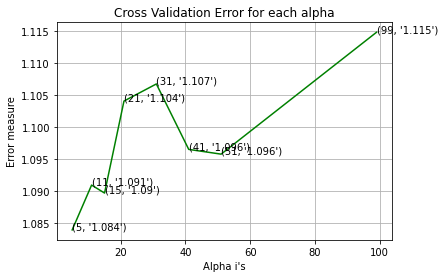

For values of best alpha =  5 The train log loss is: 0.45649793961557145
For values of best alpha =  5 The cross validation log loss is: 1.0838642491470378
For values of best alpha =  5 The test log loss is: 1.0735799575795812


In [75]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0838642491470378
Number of mis-classified points : 0.37969924812030076
-------------------- Confusion matrix --------------------


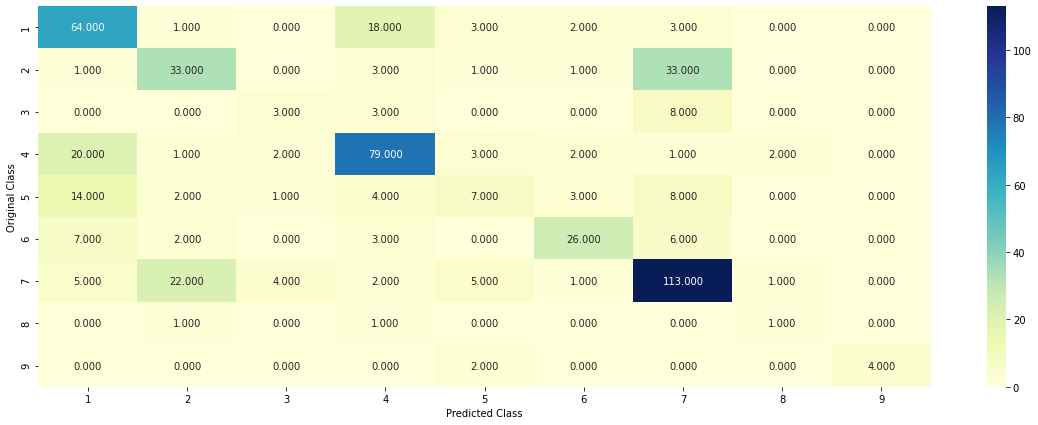

-------------------- Precision matrix (Columm Sum=1) --------------------


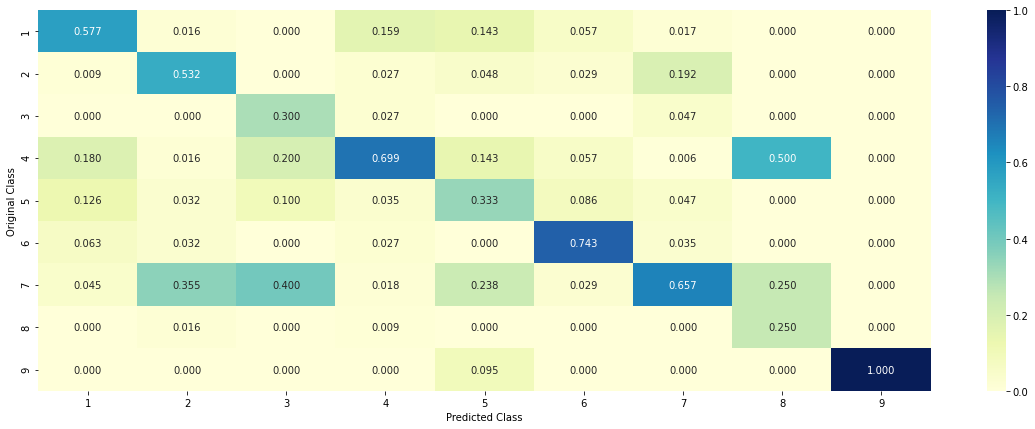

-------------------- Recall matrix (Row sum=1) --------------------


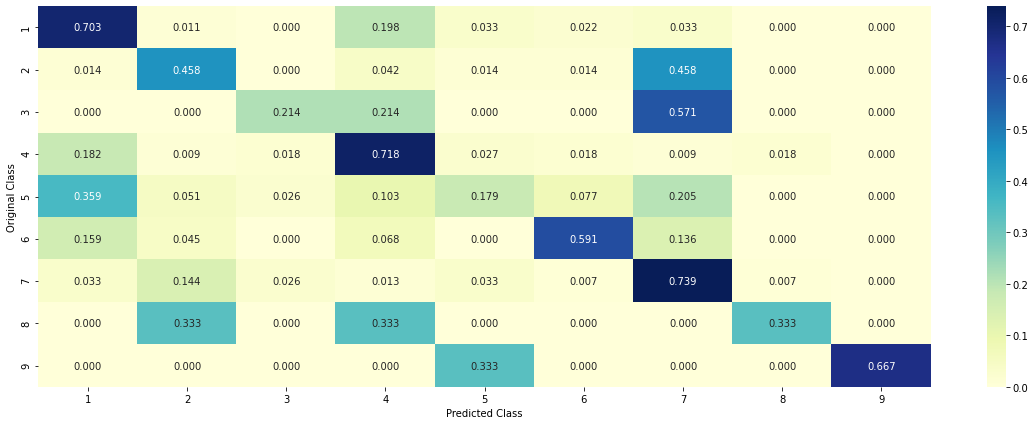

In [76]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [77]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes [4 1 1 4 1]
Fequency of nearest points : Counter({1: 3, 4: 2})


<h3>4.2.4. Sample Query Point-2 </h3>

In [78]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [6 6 6 6 6]
Fequency of nearest points : Counter({6: 5})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.332593548112581
for alpha = 1e-05
Log Loss : 1.2963504456452875
for alpha = 0.0001
Log Loss : 1.121119144098255
for alpha = 0.001
Log Loss : 1.0802458859207689
for alpha = 0.01
Log Loss : 1.197415468312956
for alpha = 0.1
Log Loss : 1.431808552888445
for alpha = 1
Log Loss : 1.6763911978918253
for alpha = 10
Log Loss : 1.7086685297949014
for alpha = 100
Log Loss : 1.7120939822376577


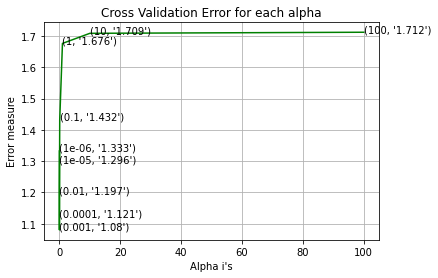

For values of best alpha =  0.001 The train log loss is: 0.5169840578489667
For values of best alpha =  0.001 The cross validation log loss is: 1.0802458859207689
For values of best alpha =  0.001 The test log loss is: 1.1169472846272053


In [79]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.0802458859207689
Number of mis-classified points : 0.35150375939849626
-------------------- Confusion matrix --------------------


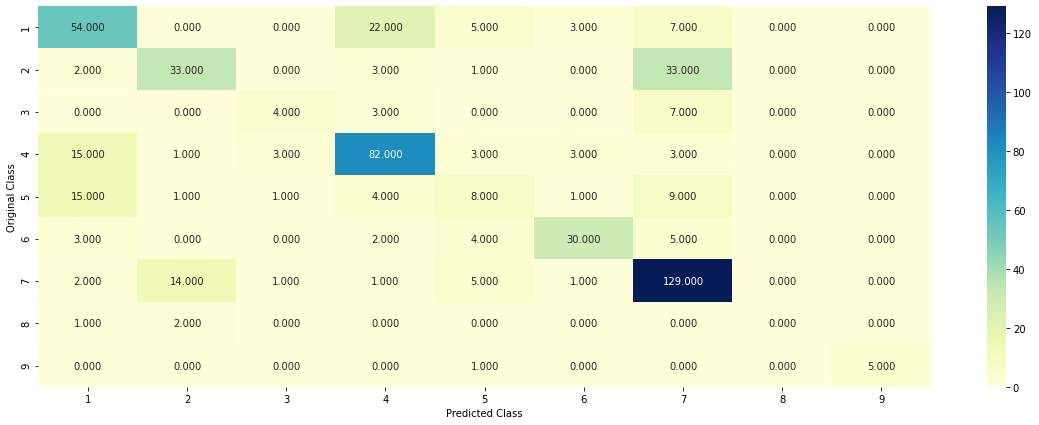

-------------------- Precision matrix (Columm Sum=1) --------------------


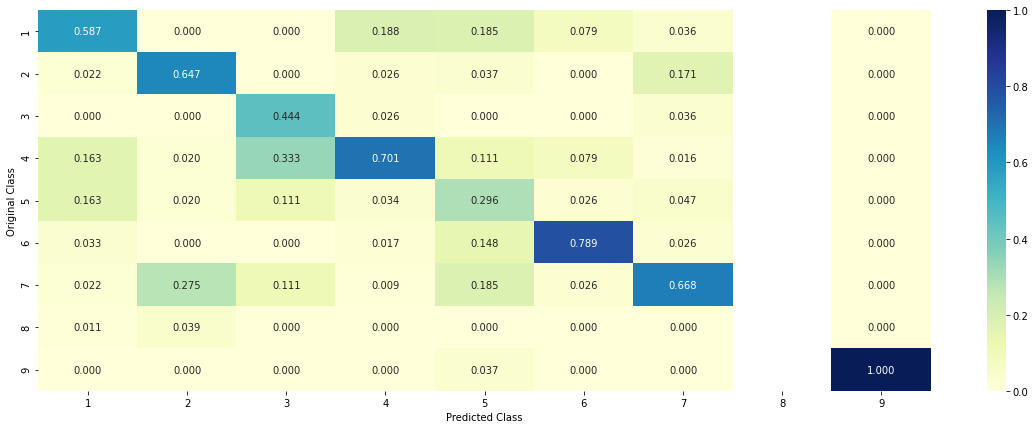

-------------------- Recall matrix (Row sum=1) --------------------


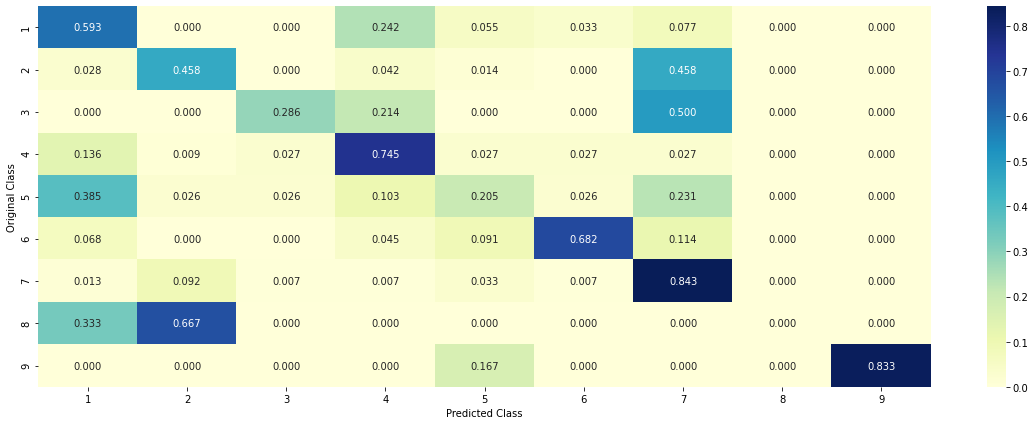

In [80]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [81]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [82]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.500e-03 2.000e-04 0.000e+00 6.000e-04 0.000e+00 0.000e+00 7.421e-01
  2.546e-01 0.000e+00]]
Actual Class : 1
--------------------------------------------------
87 Text feature [3t3] present in test data point [True]
88 Text feature [missense] present in test data point [True]
95 Text feature [constitutive] present in test data point [True]
97 Text feature [nonsense] present in test data point [True]
131 Text feature [acceptor] present in test data point [True]
134 Text feature [transforming] present in test data point [True]
143 Text feature [constitutively] present in test data point [True]
177 Text feature [activated] present in test data point [True]
187 Text feature [putative] present in test data point [True]
192 Text feature [nude] present in test data point [True]
204 Text feature [homozygous] present in test data point [True]
207 Text feature [function] present in test data point [True]
216 Text feature [thyroid] present in

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [83]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0463 0.0044 0.0028 0.0041 0.1089 0.8255 0.001  0.006  0.0009]]
Actual Class : 6
--------------------------------------------------
237 Text feature [african] present in test data point [True]
279 Text feature [encoding] present in test data point [True]
285 Text feature [western] present in test data point [True]
299 Text feature [assays] present in test data point [True]
346 Text feature [3a] present in test data point [True]
367 Text feature [2a] present in test data point [True]
376 Text feature [described] present in test data point [True]
378 Text feature [910] present in test data point [True]
425 Text feature [r2659k] present in test data point [True]
429 Text feature [similarly] present in test data point [True]
438 Text feature [e2663v] present in test data point [True]
440 Text feature [difficult] present in test data point [True]
452 Text feature [results] present in test data point [True]
457 Text feature [4a] present i

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3071077148109702
for alpha = 1e-05
Log Loss : 1.2889103634282923
for alpha = 0.0001
Log Loss : 1.1474911132868948
for alpha = 0.001
Log Loss : 1.0819846080468378
for alpha = 0.01
Log Loss : 1.230212807254744
for alpha = 0.1
Log Loss : 1.3770351660841873
for alpha = 1
Log Loss : 1.578848373089679


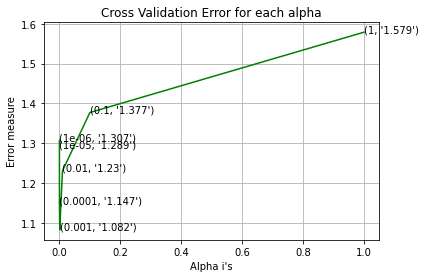

For values of best alpha =  0.001 The train log loss is: 0.5159448930935021
For values of best alpha =  0.001 The cross validation log loss is: 1.0819846080468378
For values of best alpha =  0.001 The test log loss is: 1.1172327581707608


In [84]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.0819846080468378
Number of mis-classified points : 0.34210526315789475
-------------------- Confusion matrix --------------------


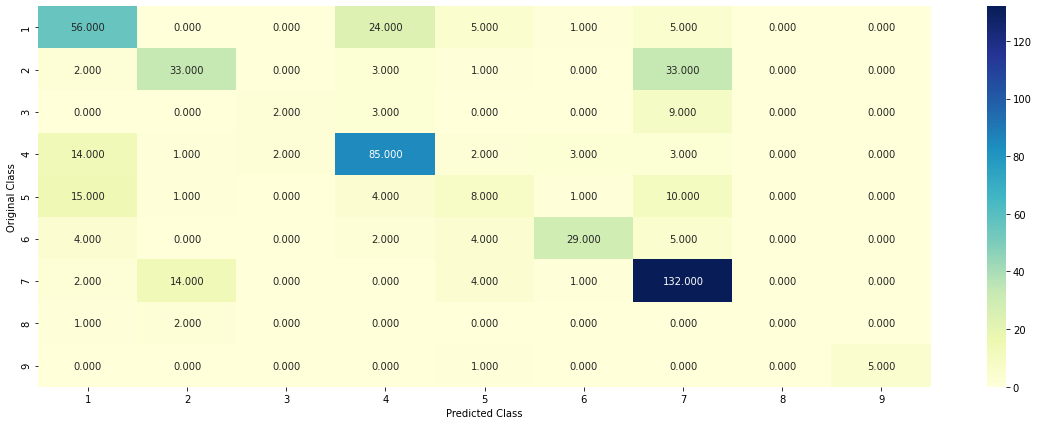

-------------------- Precision matrix (Columm Sum=1) --------------------


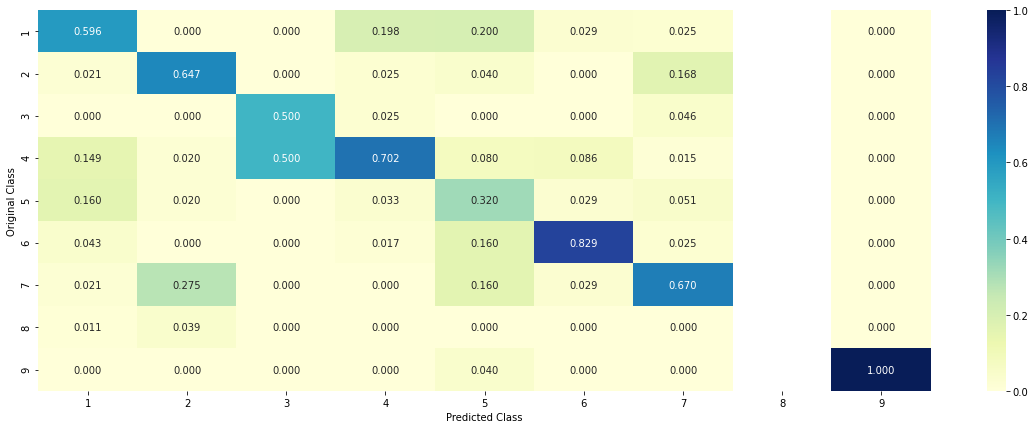

-------------------- Recall matrix (Row sum=1) --------------------


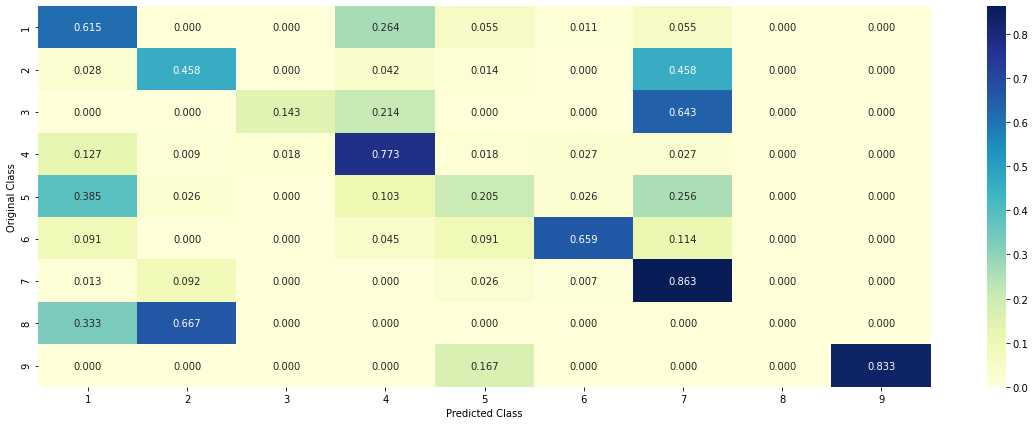

In [85]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [86]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[1.200e-03 1.000e-04 0.000e+00 6.000e-04 0.000e+00 0.000e+00 9.263e-01
  7.180e-02 0.000e+00]]
Actual Class : 1
--------------------------------------------------
136 Text feature [3t3] present in test data point [True]
177 Text feature [transforming] present in test data point [True]
197 Text feature [constitutive] present in test data point [True]
249 Text feature [constitutively] present in test data point [True]
289 Text feature [missense] present in test data point [True]
296 Text feature [pbmc] present in test data point [True]
298 Text feature [nonsense] present in test data point [True]
318 Text feature [acceptor] present in test data point [True]
323 Text feature [activated] present in test data point [True]
328 Text feature [thyroid] present in test data point [True]
339 Text feature [casp8] present in test data point [True]
340 Text feature [expressing] present in test data point [True]
343 Text feature [nude] present in te

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [87]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[6.090e-02 4.800e-03 2.500e-03 8.100e-03 8.930e-02 8.269e-01 1.700e-03
  5.500e-03 3.000e-04]]
Actual Class : 6
--------------------------------------------------
247 Text feature [african] present in test data point [True]
254 Text feature [encoding] present in test data point [True]
262 Text feature [western] present in test data point [True]
272 Text feature [assays] present in test data point [True]
287 Text feature [3a] present in test data point [True]
298 Text feature [2a] present in test data point [True]
340 Text feature [described] present in test data point [True]
387 Text feature [similarly] present in test data point [True]
405 Text feature [results] present in test data point [True]
408 Text feature [910] present in test data point [True]
417 Text feature [4a] present in test data point [True]
436 Text feature [difficult] present in test data point [True]
439 Text feature [r2659k] present in test data point [True]
441 Te

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3057512774307507
for C = 0.0001
Log Loss : 1.2248573863865082
for C = 0.001
Log Loss : 1.1404532919367527
for C = 0.01
Log Loss : 1.1512101010593812
for C = 0.1
Log Loss : 1.357673559891173
for C = 1
Log Loss : 1.6949343595449604
for C = 10
Log Loss : 1.7125843363055169
for C = 100
Log Loss : 1.712584638314707


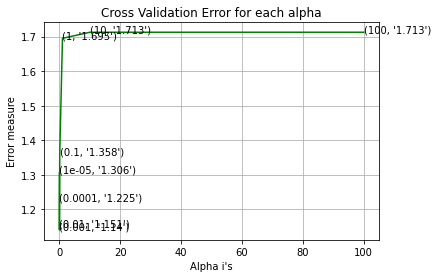

For values of best alpha =  0.001 The train log loss is: 0.5233871360423087
For values of best alpha =  0.001 The cross validation log loss is: 1.1404532919367527
For values of best alpha =  0.001 The test log loss is: 1.14515671196616


In [88]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.1404532919367527
Number of mis-classified points : 0.35714285714285715
-------------------- Confusion matrix --------------------


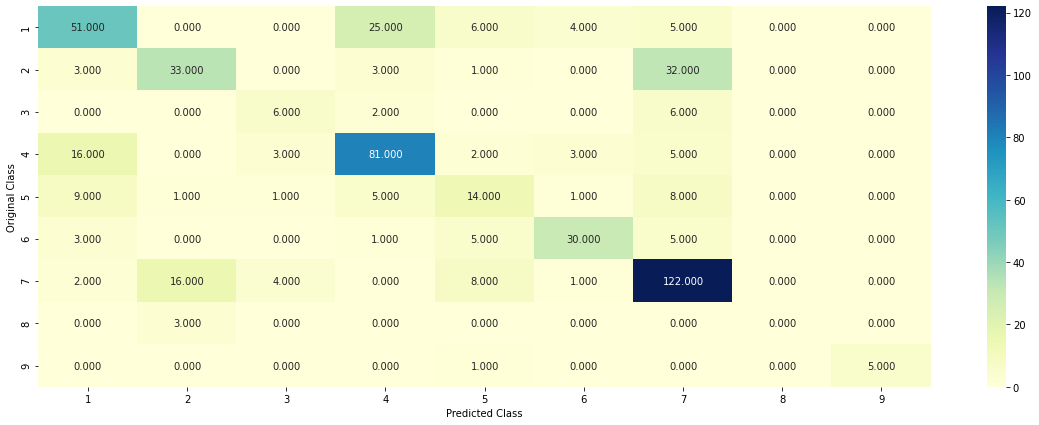

-------------------- Precision matrix (Columm Sum=1) --------------------


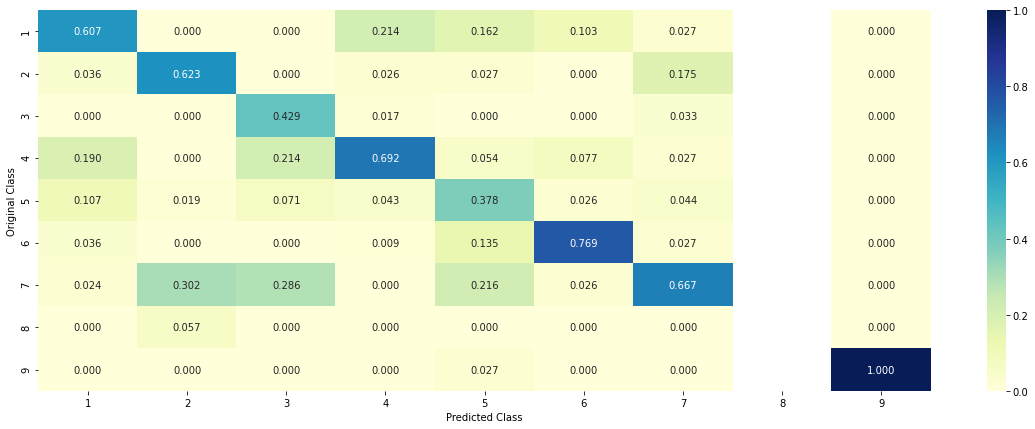

-------------------- Recall matrix (Row sum=1) --------------------


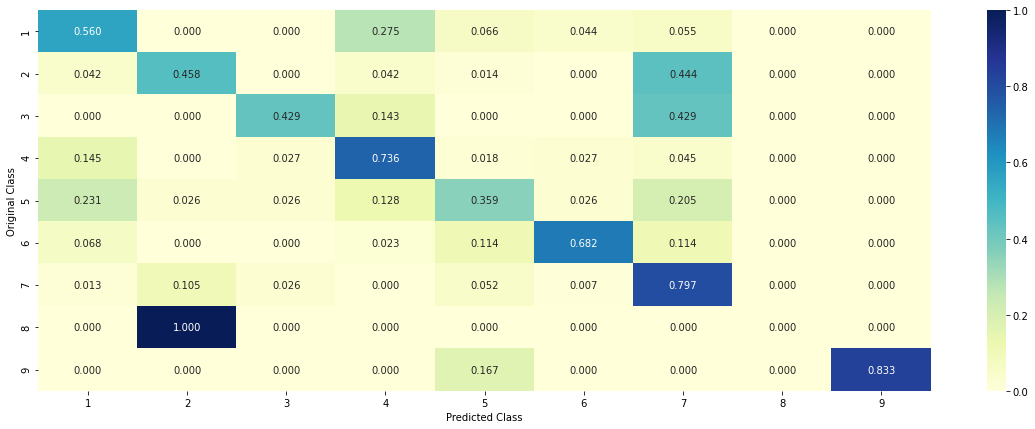

In [89]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [90]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[8.310e-02 2.500e-03 0.000e+00 1.711e-01 2.000e-04 0.000e+00 6.937e-01
  4.810e-02 1.200e-03]]
Actual Class : 1
--------------------------------------------------
244 Text feature [pdc] present in test data point [True]
277 Text feature [casp8] present in test data point [True]
396 Text feature [pbmc] present in test data point [True]
462 Text feature [papilloma] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [91]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.1181 0.0674 0.0131 0.0782 0.1113 0.5076 0.0933 0.0056 0.0053]]
Actual Class : 6
--------------------------------------------------
312 Text feature [910] present in test data point [True]
427 Text feature [suffered] present in test data point [True]
433 Text feature [r2659k] present in test data point [True]
438 Text feature [e2663v] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [92]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2541372524559073
for n_estimators = 100 and max depth =  10
Log Loss : 1.1774198136735963
for n_estimators = 200 and max depth =  5
Log Loss : 1.2444636103365136
for n_estimators = 200 and max depth =  10
Log Loss : 1.1690629836569912
for n_estimators = 500 and max depth =  5
Log Loss : 1.2399648428192922
for n_estimators = 500 and max depth =  10
Log Loss : 1.16349617152869
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2374805020201842
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1594887115662107
for n_estimators = 2000 and max depth =  5
Log Loss : 1.234907349466752
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1575262634602135
For values of best estimator =  2000 The train log loss is: 0.6776111085687401
For values of best estimator =  2000 The cross validation log loss is: 1.1575262634602135
For values of best estimator =  2000 The test log loss is: 1.1553967926397293


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1575262634602135
Number of mis-classified points : 0.40037593984962405
-------------------- Confusion matrix --------------------


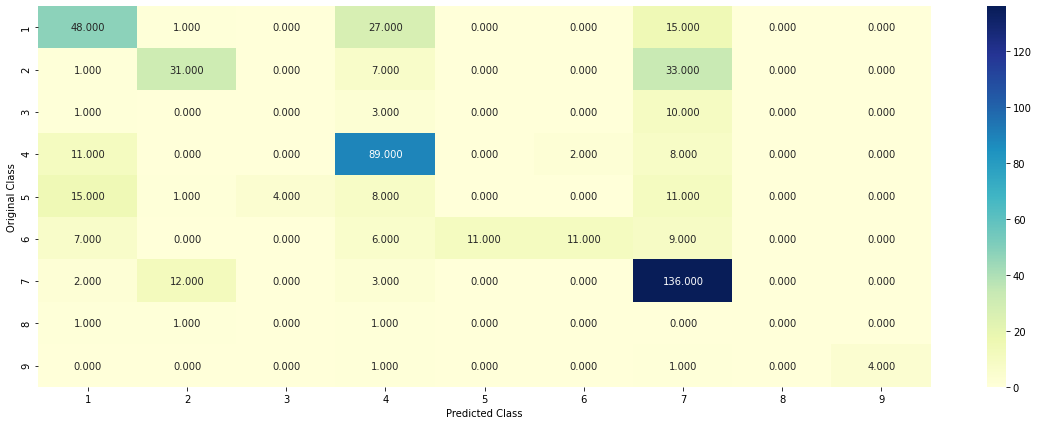

-------------------- Precision matrix (Columm Sum=1) --------------------


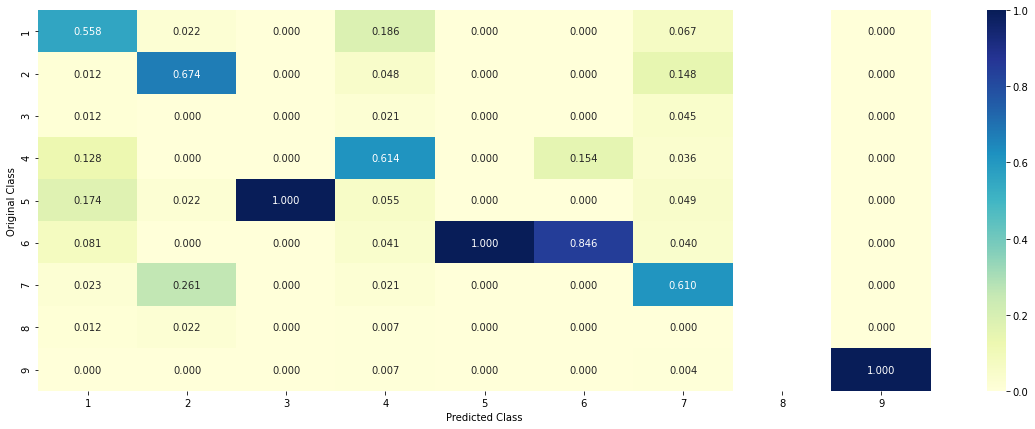

-------------------- Recall matrix (Row sum=1) --------------------


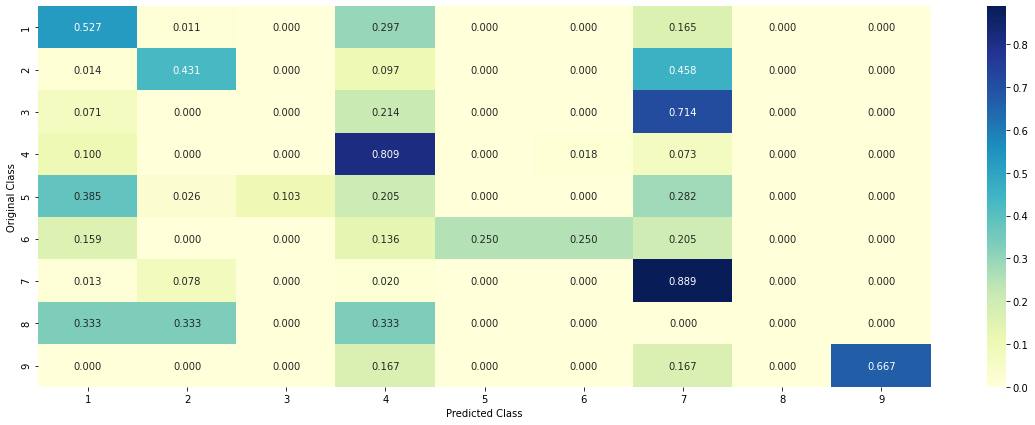

In [93]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [94]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1602 0.1647 0.0179 0.1121 0.046  0.0378 0.4087 0.0104 0.0422]]
Actual Class : 1
--------------------------------------------------
0 Text feature [activating] present in test data point [True]
2 Text feature [missense] present in test data point [True]
4 Text feature [activation] present in test data point [True]
7 Text feature [activated] present in test data point [True]
8 Text feature [signaling] present in test data point [True]
9 Text feature [function] present in test data point [True]
10 Text feature [constitutive] present in test data point [True]
11 Text feature [inhibitor] present in test data point [True]
13 Text feature [treatment] present in test data point [True]
14 Text feature [3t3] present in test data point [True]
16 Text feature [growth] present in test data point [True]
17 Text feature [suppressor] present in test data point [True]
18 Text feature [nonsense] present in test data point [True]
20 Text feature [cel

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [95]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0683 0.0121 0.0119 0.0224 0.5113 0.358  0.0098 0.0027 0.0037]]
Actuall Class : 6
--------------------------------------------------
2 Text feature [missense] present in test data point [True]
4 Text feature [activation] present in test data point [True]
9 Text feature [function] present in test data point [True]
19 Text feature [deleterious] present in test data point [True]
20 Text feature [cells] present in test data point [True]
22 Text feature [brca1] present in test data point [True]
23 Text feature [therapeutic] present in test data point [True]
27 Text feature [pathogenic] present in test data point [True]
33 Text feature [functional] present in test data point [True]
35 Text feature [variants] present in test data point [True]
45 Text feature [loss] present in test data point [True]
56 Text feature [clinical] present in test data point [True]
58 Text feature [patients] present in test data point [True]
59 Text feature [prot

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [96]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.9972301332434472
for n_estimators = 10 and max depth =  3
Log Loss : 1.6556094896223896
for n_estimators = 10 and max depth =  5
Log Loss : 1.518731632098029
for n_estimators = 10 and max depth =  10
Log Loss : 1.7633377640698271
for n_estimators = 50 and max depth =  2
Log Loss : 1.631846483282115
for n_estimators = 50 and max depth =  3
Log Loss : 1.360688432990522
for n_estimators = 50 and max depth =  5
Log Loss : 1.3204382837622224
for n_estimators = 50 and max depth =  10
Log Loss : 1.5500422037961463
for n_estimators = 100 and max depth =  2
Log Loss : 1.5413668102591536
for n_estimators = 100 and max depth =  3
Log Loss : 1.4196019228514207
for n_estimators = 100 and max depth =  5
Log Loss : 1.268963679854163
for n_estimators = 100 and max depth =  10
Log Loss : 1.5728803904186461
for n_estimators = 200 and max depth =  2
Log Loss : 1.572055690300817
for n_estimators = 200 and max depth =  3
Log Loss : 1.435620932330236
for

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.268963679854163
Number of mis-classified points : 0.41541353383458646
-------------------- Confusion matrix --------------------


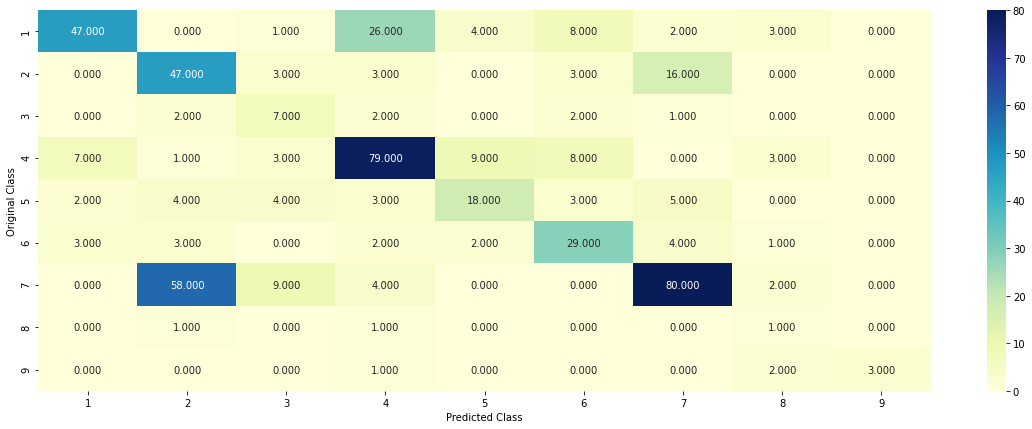

-------------------- Precision matrix (Columm Sum=1) --------------------


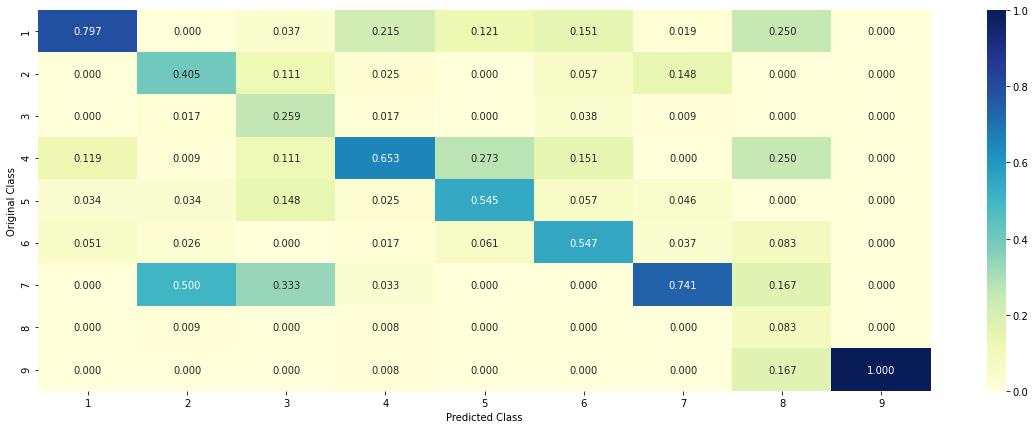

-------------------- Recall matrix (Row sum=1) --------------------


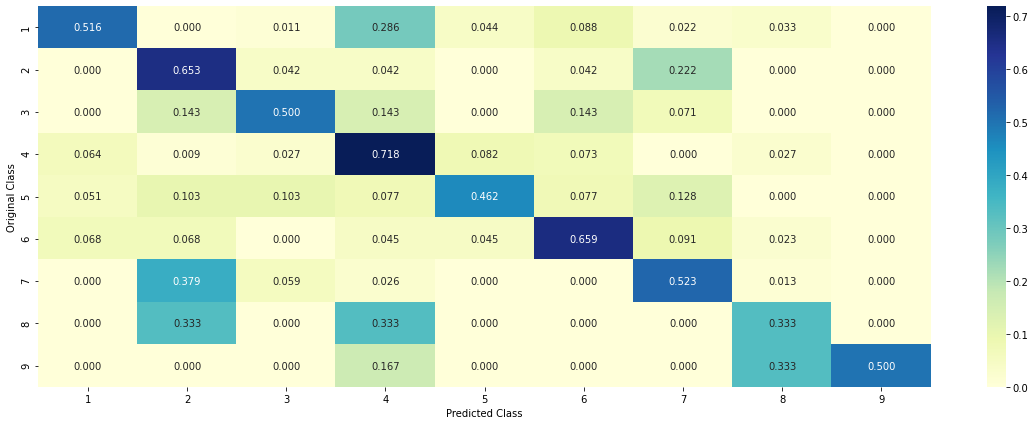

In [97]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [98]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[0.786  0.0037 0.0021 0.1832 0.0022 0.0103 0.0026 0.0043 0.0056]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [99]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.0151 0.0049 0.0186 0.0131 0.1606 0.7709 0.003  0.0067 0.0072]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [100]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.08
Support vector machines : Log Loss: 1.70
Naive Bayes : Log Loss: 1.27
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.818
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.724
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.346
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.237
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.504
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.821


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.4965832730652418
Log loss (CV) on the stacking classifier : 1.2366292222365654
Log loss (test) on the stacking classifier : 1.2105003583236056
Number of missclassified point : 0.3669172932330827
-------------------- Confusion matrix --------------------


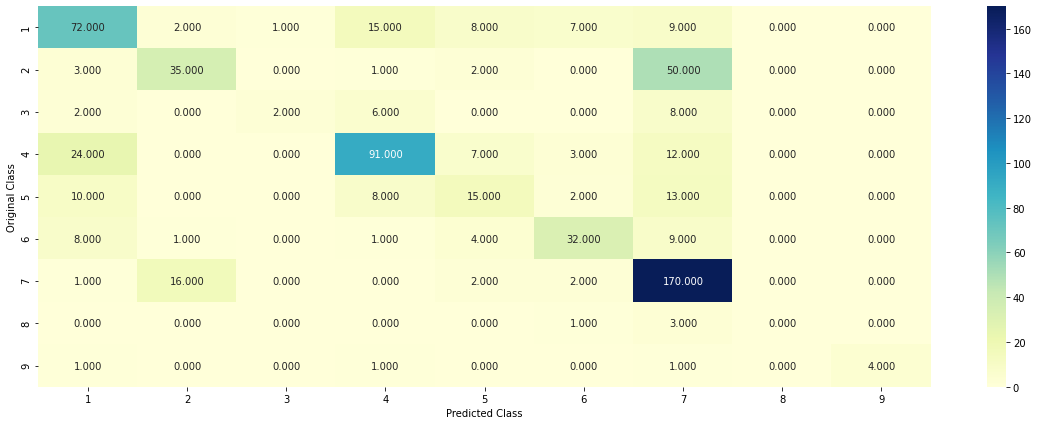

-------------------- Precision matrix (Columm Sum=1) --------------------


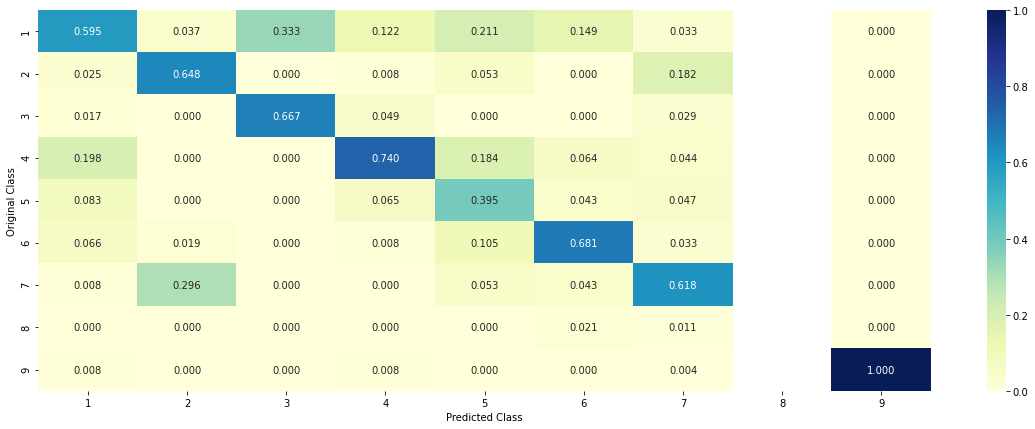

-------------------- Recall matrix (Row sum=1) --------------------


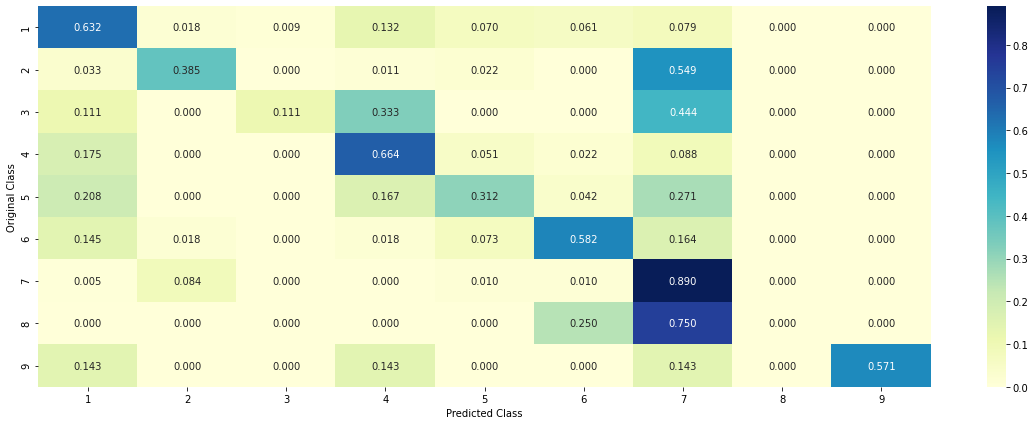

In [101]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8532265941041735
Log loss (CV) on the VotingClassifier : 1.1852293540465224
Log loss (test) on the VotingClassifier : 1.1952639101391376
Number of missclassified point : 0.37293233082706767
-------------------- Confusion matrix --------------------


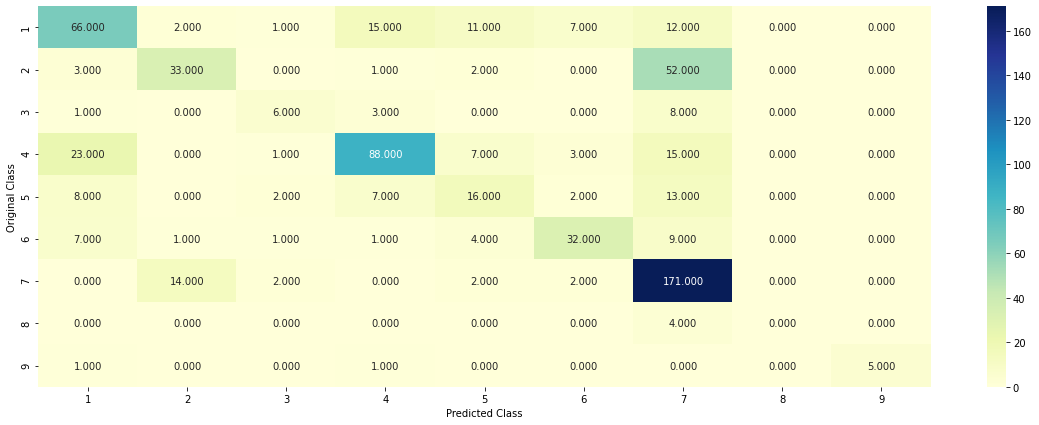

-------------------- Precision matrix (Columm Sum=1) --------------------


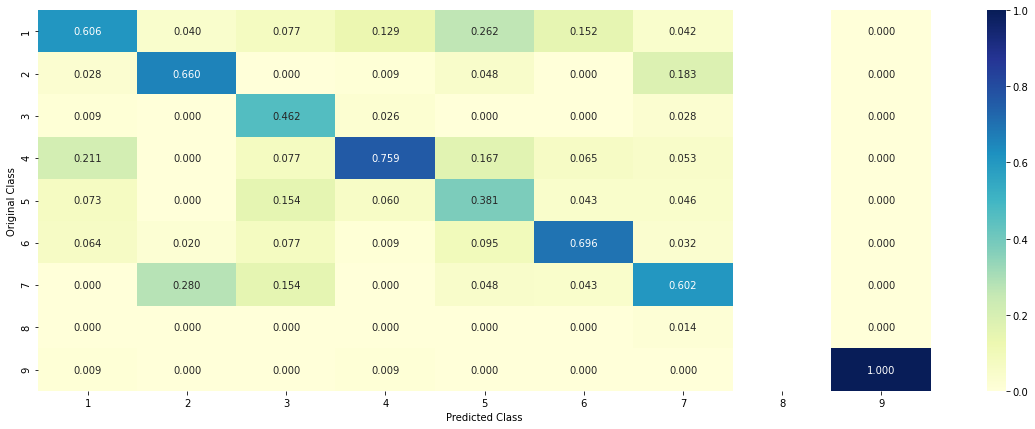

-------------------- Recall matrix (Row sum=1) --------------------


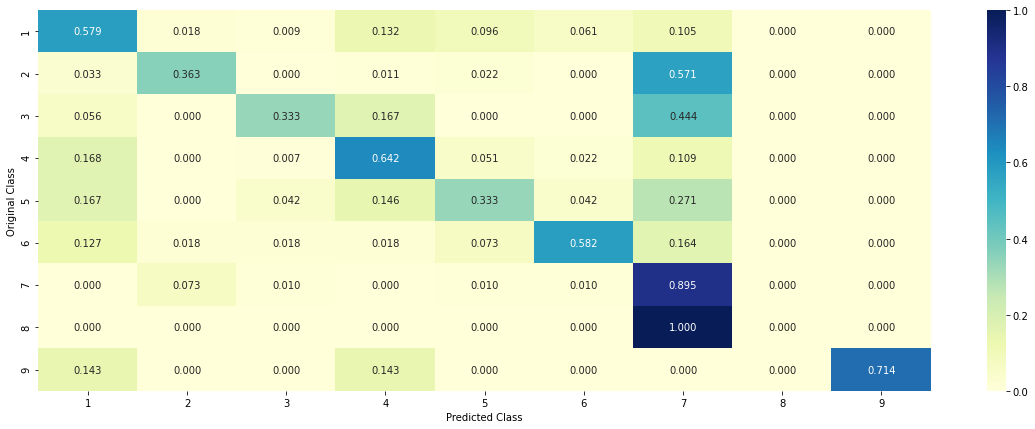

In [102]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

## Assignment

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

### BEST Model with log-loss < 1

#### Data Features TFIDF - Top 1000 features + SVD  

for alpha = 1e-06
Log Loss : 1.332593548112581
for alpha = 1e-05
Log Loss : 1.2963504456452875
for alpha = 0.0001
Log Loss : 1.121119144098255
for alpha = 0.0009
Log Loss : 1.078965055316149
for alpha = 0.001
Log Loss : 1.0802458859207689
for alpha = 0.005
Log Loss : 1.1550488049435303
for alpha = 0.01
Log Loss : 1.197415468312956
for alpha = 0.1
Log Loss : 1.431808552888445
for alpha = 1
Log Loss : 1.6763911978918253


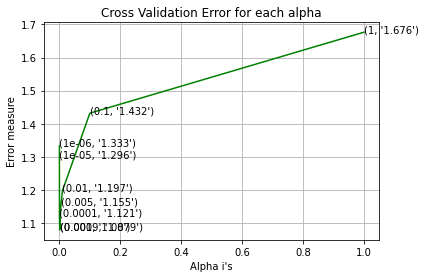

For values of best alpha =  0.0009 The train log loss is: 0.5119042205261335
For values of best alpha =  0.0009 The cross validation log loss is: 1.078965055316149
For values of best alpha =  0.0009 The test log loss is: 1.1156661686159746


In [103]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
# check here

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [1e-06, 1e-05, 0.0001,0.0009, 0.001,0.005, 0.01, 0.1, 1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [104]:
alpha[best_alpha]

0.0009

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.078965055316149
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


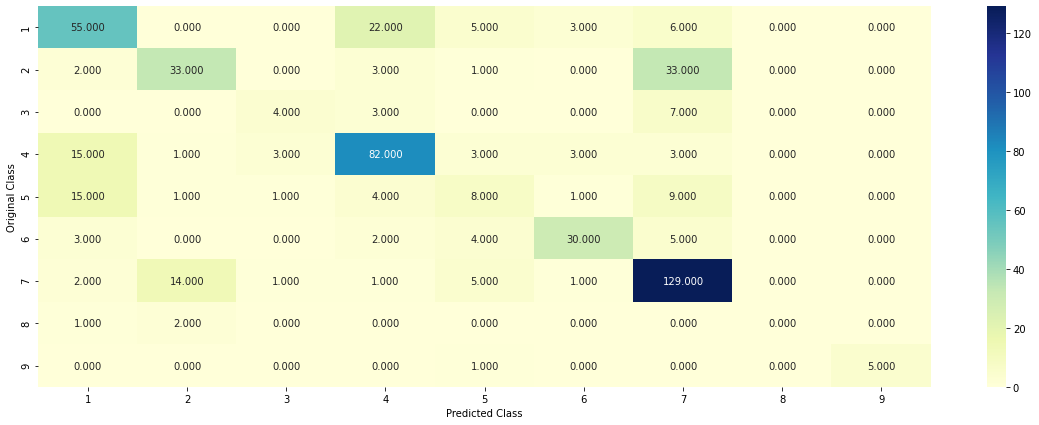

-------------------- Precision matrix (Columm Sum=1) --------------------


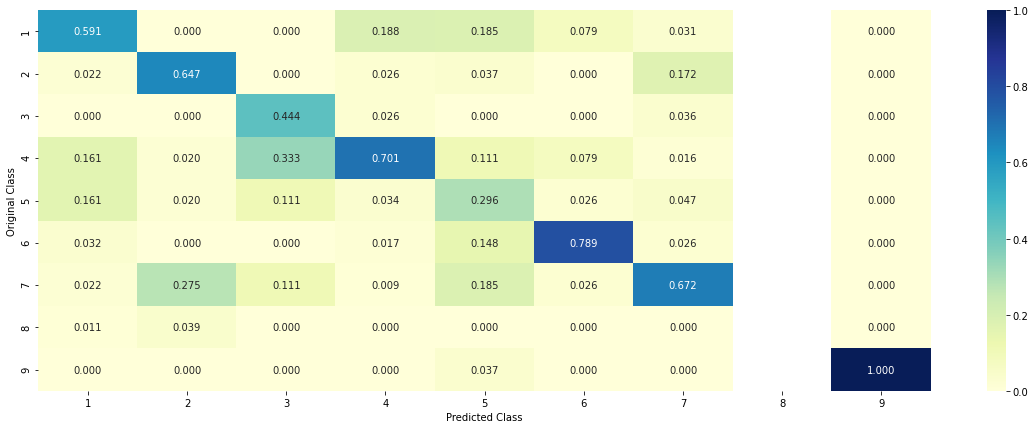

-------------------- Recall matrix (Row sum=1) --------------------


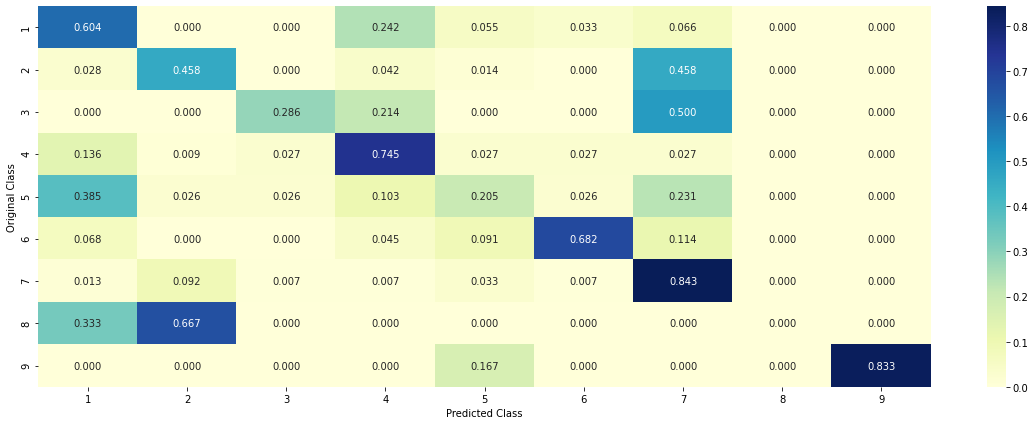

In [105]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [106]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0509 0.0047 0.0028 0.0046 0.1118 0.817  0.0011 0.0062 0.001 ]]
Actual Class : 6
--------------------------------------------------
168 Text feature [african] present in test data point [True]
241 Text feature [910] present in test data point [True]
357 Text feature [951] present in test data point [True]
423 Text feature [ivs2] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h4>4.3.2.4. Feature Importance, Incorrectly Classified point</h4>

In [107]:
test_point_index = 105
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.000e+00 1.010e-02 1.000e-04 0.000e+00 1.000e-04 0.000e+00 9.808e-01
  8.700e-03 1.000e-04]]
Actual Class : 7
--------------------------------------------------
37 Text feature [constitutive] present in test data point [True]
53 Text feature [rhscf] present in test data point [True]
63 Text feature [transforming] present in test data point [True]
80 Text feature [constitutively] present in test data point [True]
88 Text feature [oncogene] present in test data point [True]
91 Text feature [stat5] present in test data point [True]
104 Text feature [activated] present in test data point [True]
105 Text feature [mapk] present in test data point [True]
140 Text feature [sti571] present in test data point [True]
143 Text feature [tk1] present in test data point [True]
161 Text feature [technology] present in test data point [True]
175 Text feature [e839k] present in test data point [True]
176 Text feature [expressing] present in test data

### Count Vectorizer WITH Unigrams and Bigrams

In [108]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3,ngram_range=(1,3))
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [109]:
# check here
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))



print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 780579


In [110]:
# don't forget to normalize every feature
# check here
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [111]:
# merging gene, variance and text features
# check here
# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5],  
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4963913418734782
for alpha = 1e-05
Log Loss : 1.4993738361057232
for alpha = 0.0001
Log Loss : 1.3917927849397196
for alpha = 0.001
Log Loss : 1.1458831985070872
for alpha = 0.01
Log Loss : 1.1661585489024273
for alpha = 0.1
Log Loss : 1.2574282466109679
for alpha = 1
Log Loss : 1.300673208962117


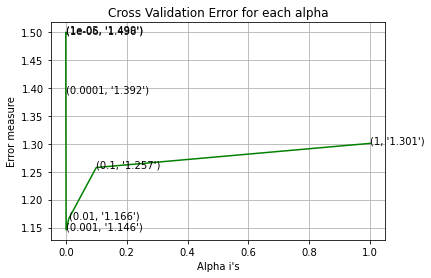

For values of best alpha =  0.001 The train log loss is: 0.6501803719755087
For values of best alpha =  0.001 The cross validation log loss is: 1.1458831985070872
For values of best alpha =  0.001 The test log loss is: 1.2091071986145268


In [112]:
#check here count
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.1458831985070872
Number of mis-classified points : 0.37969924812030076
-------------------- Confusion matrix --------------------


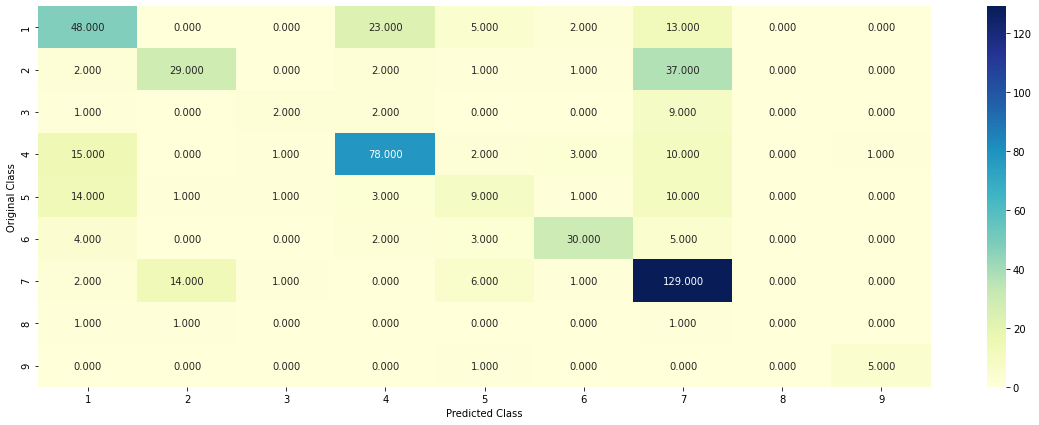

-------------------- Precision matrix (Columm Sum=1) --------------------


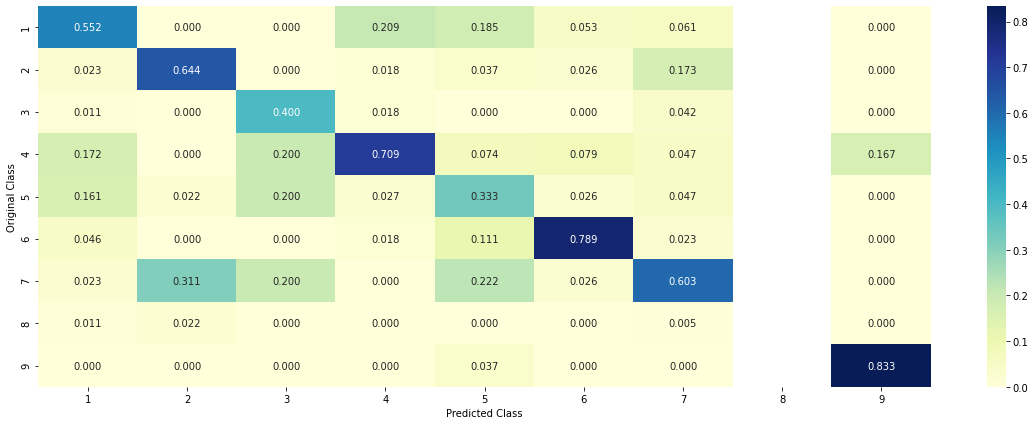

-------------------- Recall matrix (Row sum=1) --------------------


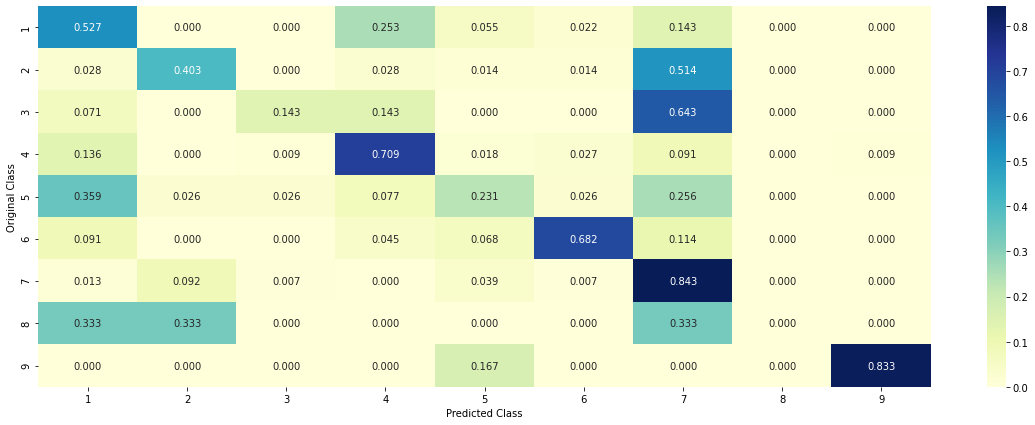

In [113]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [114]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [115]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[8.570e-02 2.370e-02 3.800e-03 4.700e-03 5.000e-04 0.000e+00 5.946e-01
  2.711e-01 1.580e-02]]
Actual Class : 1
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [116]:
test_point_index = 40
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0114 0.1242 0.1558 0.0123 0.0156 0.0073 0.6552 0.0091 0.009 ]]
Actual Class : 7
--------------------------------------------------
Out of the top  500  features  0 are present in query point


## Conclusion:

In [3]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model + Features", "Alpha-Hyper parameter","CV log loss", "Test log loss","Mis-classification"]

x.add_row(["Random", "---", 2.47, 2.47,"-----"])
x.add_row(["Naive Bayes , Tfidf ", "0.1", 1.26, 1.28 , 0.39])
x.add_row(["KNN , Tfidf ", 5 , 1.08 , 1.07 , 0.37])
x.add_row(["LR(Balanced) , Tfidf", 0.001, 1.08, 1.11 , 0.35])
x.add_row(["LR(Imbalanced) ,Tfidf", 0.001, 1.08, 1.22, 0.34])
x.add_row(["Linear SVM ,Tfidf", 0.001, 1.14, 1.14, 0.35])
x.add_row(["Random Forest ,Tfidf(OHE)", "Estimators:2000,Depth:10", 1.15, 1.156,0.40])
x.add_row(["Random Forest ,Tfidf(Response Encoding)", "Estimators:100,Depth:10", 1.2, 1.34,0.41])
x.add_row(["Stacking(LR,SVM,NB) ,Tfidf", 1 , 1.23, 1.21,0.36])
x.add_row(["Max Voting(RF,LR,SVM) ,Tfidf", "---", 1.07, 1.11,0.37])
x.add_row(["LR(Balanced) ,Tfidf(TOP-1000, SVD-2000)", 0.0009 , 1.07, 1.11,0.34])
x.add_row(["LR(Balanced) ,CountVec(Unigram,Bigram)", 0.001, 1.14, 1.20,0.38])


print(x)

+-----------------------------------------+--------------------------+-------------+---------------+--------------------+
|             Model + Features            |  Alpha-Hyper parameter   | CV log loss | Test log loss | Mis-classification |
+-----------------------------------------+--------------------------+-------------+---------------+--------------------+
|                  Random                 |           ---            |     2.47    |      2.47     |       -----        |
|           Naive Bayes , Tfidf           |           0.1            |     1.26    |      1.28     |        0.39        |
|               KNN , Tfidf               |            5             |     1.08    |      1.07     |        0.37        |
|           LR(Balanced) , Tfidf          |          0.001           |     1.08    |      1.11     |        0.35        |
|          LR(Imbalanced) ,Tfidf          |          0.001           |     1.08    |      1.22     |        0.34        |
|            Linear SVM 